# Cleaning Training Data

For this analysis, we will use the public Airbnb data available on the site [Inside Airbnb](http://insideairbnb.com/get-the-data/), specifically, we will use the dataset corresponding to Mexico City on the quarter June 27th-Sept 22nd, 2023 (scraped in September 23rd and 24th). We'll clean the data and leave a dataset ready for exploration.

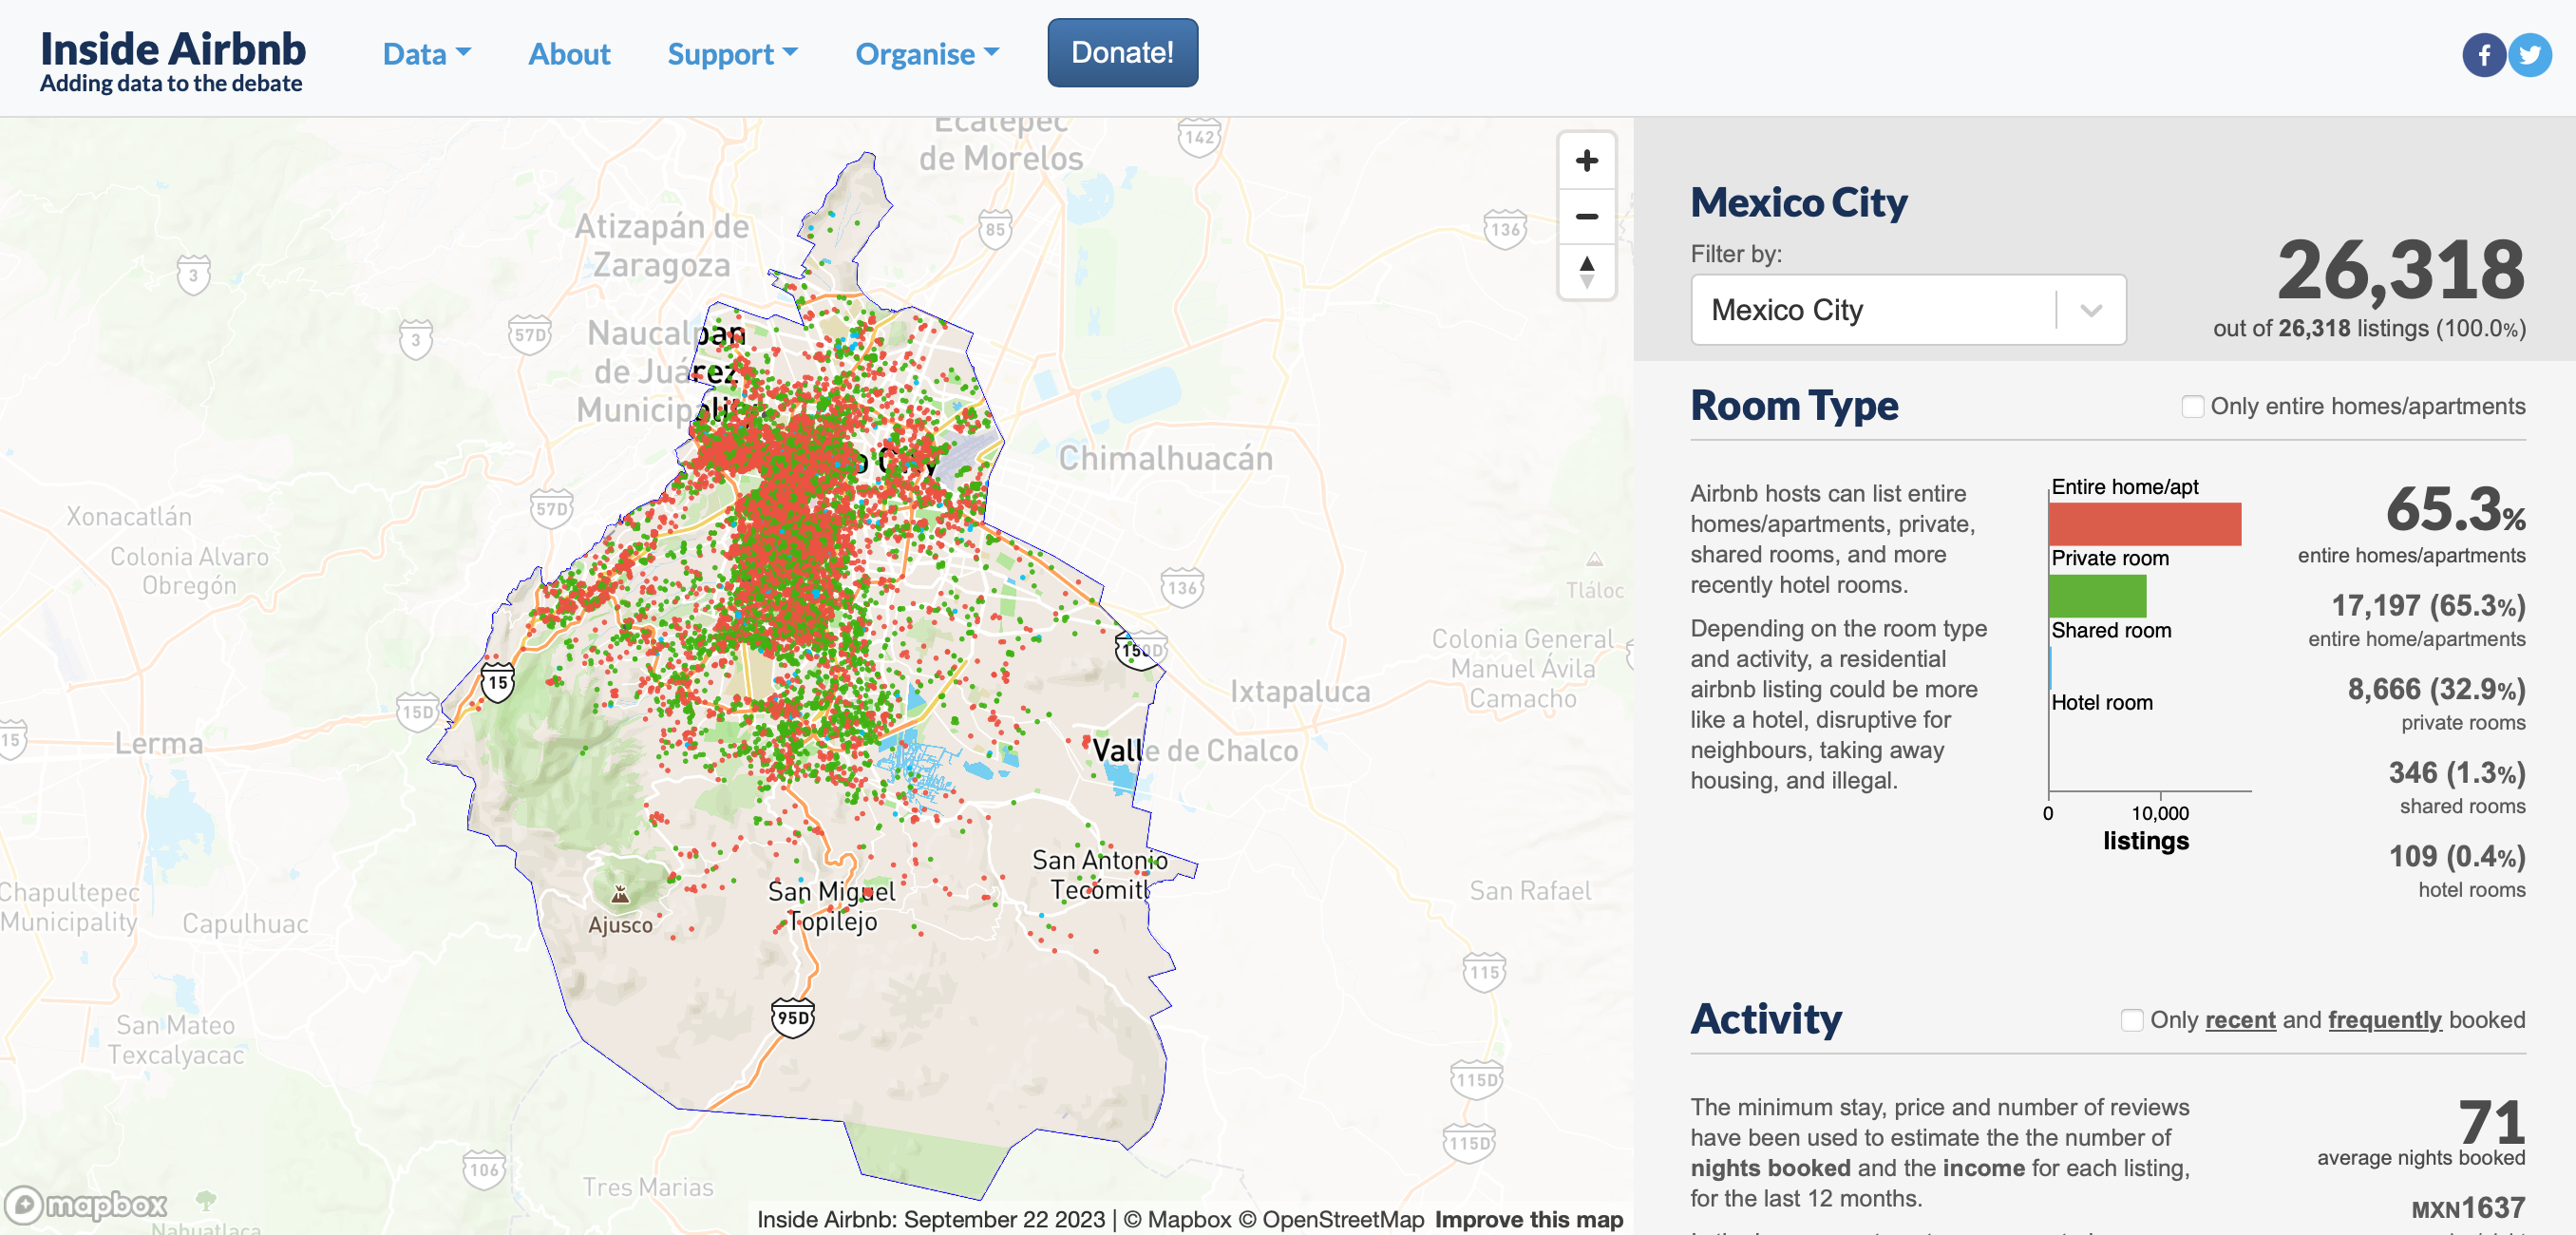

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

listings = pd.read_csv("../data/listings.csv")
print(listings.shape)

(26318, 75)


In [ ]:
listings.head()

id                          listing_url       scrape_id last_scraped  \
0   35797   https://www.airbnb.com/rooms/35797  20230922223244   2023-09-23   
1  611179  https://www.airbnb.com/rooms/611179  20230922223244   2023-09-23   
2  611337  https://www.airbnb.com/rooms/611337  20230922223244   2023-09-23   
3  613181  https://www.airbnb.com/rooms/613181  20230922223244   2023-09-23   
4  617137  https://www.airbnb.com/rooms/617137  20230922223244   2023-09-23   

            source                                               name  \
0      city scrape  Villa in Mexico City · 1 bedroom · 1 bed · 1 bath   
1      city scrape  Condo in Mexico City · 1 bedroom · 2 beds · 1....   
2      city scrape  Condo in Mexico City · ★5.0 · 2 bedrooms · 4 b...   
3      city scrape  Rental unit in Mexico City · ★4.76 · 2 bedroom...   
4  previous scrape  Rental unit in Mexico City · 1 bedroom · 1 bed...   

                                         description  \
0  Dentro de Villa un estudio de arte con futon, ...   
1  LOTS OF SPACE AND STYLE. ROMANTIC. <br />AMAZI...   
2  IDEAL FOR  2 COUPLES OR 4 FRIENDS <br />LOTS O...   
3  Couples history with comfort, playful elegance...   
4  <b>The space</b><br />All services. 2 rooms. 1...   

                               neighborhood_overview  \
0  Centro comercial Santa Fe, parque interlomas y...   
1  Mexico City's historic center, declared a Worl...   
2  Mexico City's historic center, declared a Worl...   
3  Casa Tezontle is in Mexico’s City Historic Dow...   
4                                                NaN   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/f395ab78-1185...   153786  ...   
1  https://a0.muscache.com/pictures/7734976/9633d...  1297488  ...   
2  https://a0.muscache.com/pictures/51547139/b996...  1297488  ...   
3  https://a0.muscache.com/pictures/9084124/44864...  3040937  ...   
4  https://a0.muscache.com/pictures/9187120/91a96...  3059169  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                         NaN                    NaN                 NaN   
1                        4.00                   3.00                4.00   
2                        5.00                   5.00                5.00   
3                        4.95                   4.73                4.72   
4                         NaN                    NaN                 NaN   

  license instant_bookable calculated_host_listings_count  \
0     NaN                f                              1   
1     NaN                f                              6   
2     NaN                f                              6   
3     NaN                t                              1   
4     NaN                f                              1   

  calculated_host_listings_count_entire_homes  \
0                                           1   
1                                           6   
2                                           6   
3                                           1   
4                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0               NaN  
1                                           0              0.01  
2                                           0              0.04  
3                                           0              1.47  
4                                           1               NaN  

[5 rows x 75 columns]

In [ ]:
listings.duplicated().sum()

0

In [ ]:
cols = listings.columns
cols

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [ ]:
listings.last_scraped.unique()

array(['2023-09-23', '2023-09-24'], dtype=object)

Let's explore in detail the first row:

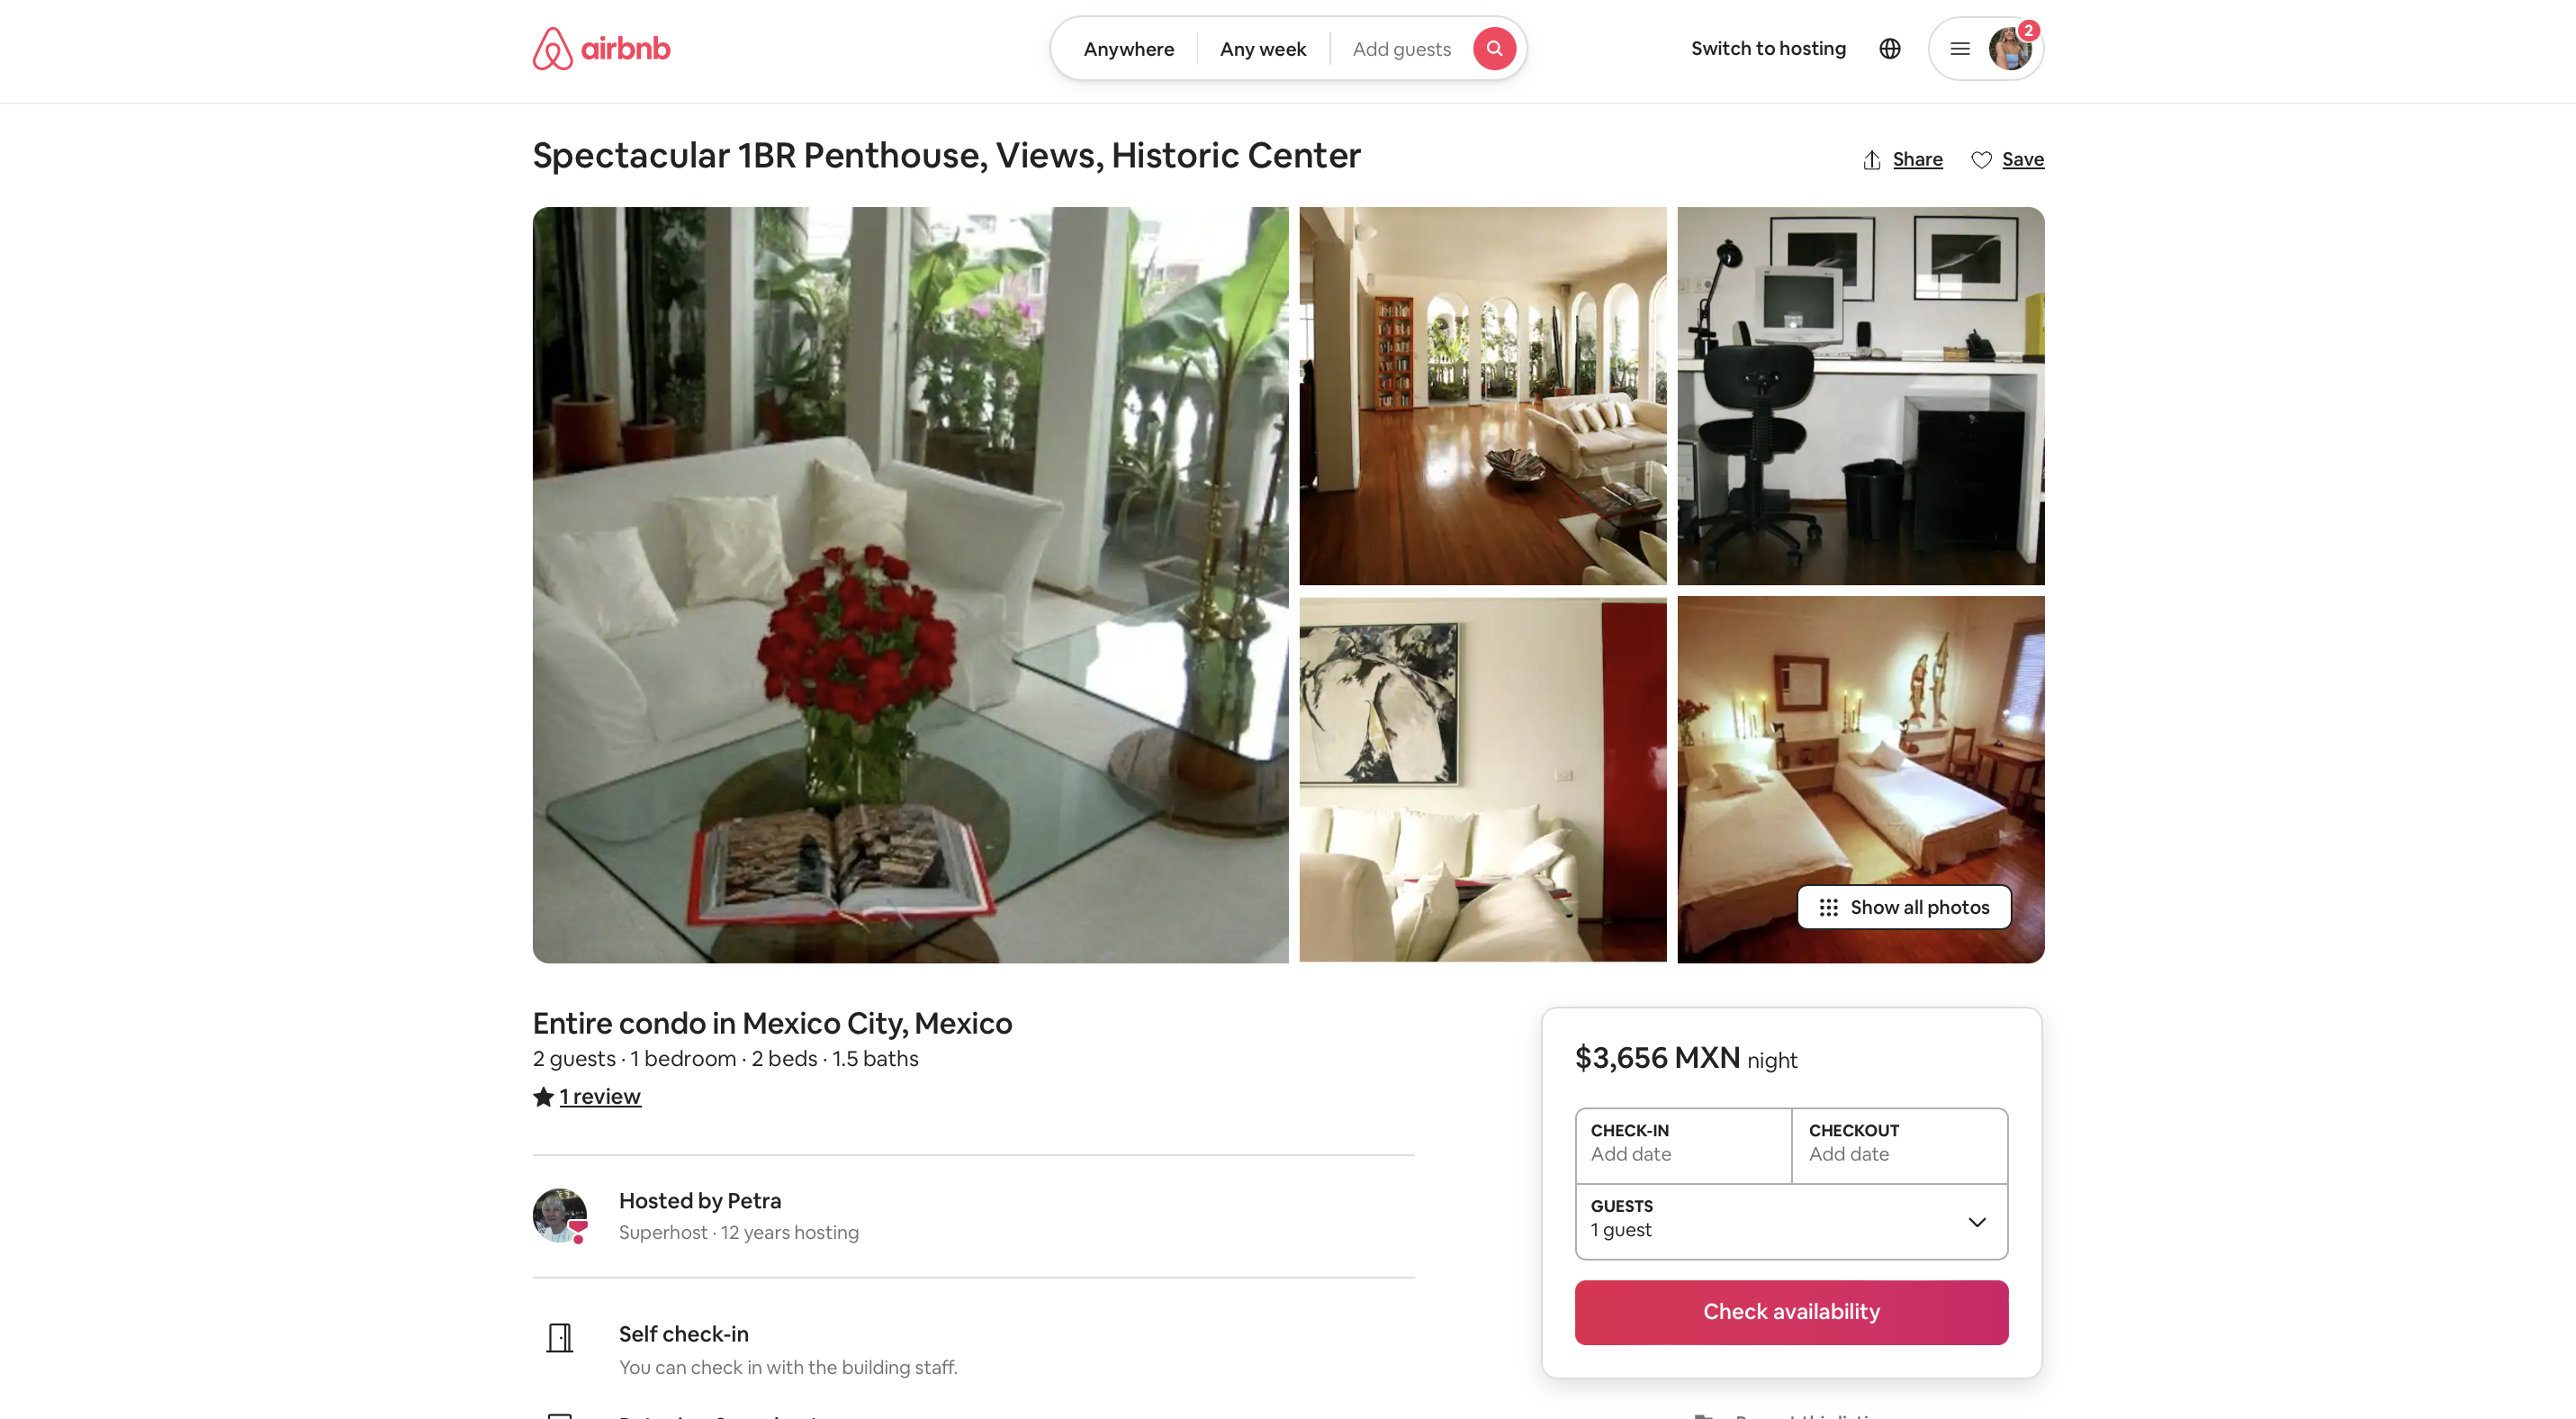

In [ ]:
for col_name, col in zip(cols, listings.iloc[1]):
    print(str(col_name) +': '+ str(col) + '\n')

id: 611179

listing_url: https://www.airbnb.com/rooms/611179

scrape_id: 20230922223244

last_scraped: 2023-09-23

source: city scrape

name: Condo in Mexico City · 1 bedroom · 2 beds · 1.5 baths

description: LOTS OF SPACE AND STYLE. ROMANTIC. <br />AMAZING VIEWS AND SERVICE. <br />BEST PART OF HISTORIC CENTER -  <br />MUSEUMS, SITES, RESTAURANTS ....<br />CONTINENTAL BREAKFAST INCLUDED.<br />MAID SERVICE MON, WED AND FRI .<br />TOURS AND TRANSPORT ASSISTANCE.<br />PERSONAL ATTENTION BY OWNER.<br /><br /><b>The space</b><br />This exclusive 1-BR penthouse apartment in Mexico City's historic center has wonderful views and is within walking distance of major attractions and the subway. <br /><br />Apartment consists of a dble bedroom (one king bed or two twins) with en-suite marble bathroom,  a huge open-plan living/dining area, a fully equipped kitchen, and a plant-filled terrace. The building has 24-hour security. <br /><br />EXCLUSIVE USE OF APARTMENT!<br />NO SHARING WITH OTHER GUES

## 1. Host columns

In [ ]:
listings.host_response_time.unique()

array([nan, 'within a day', 'within an hour', 'within a few hours',
       'a few days or more'], dtype=object)

In [ ]:
listings.host_since.unique

<bound method Series.unique of 0        2010-06-28
1        2011-10-16
2        2011-10-16
3        2012-07-24
4        2012-07-26
            ...    
26313    2022-07-23
26314    2022-12-28
26315    2019-12-30
26316    2023-08-21
26317    2021-05-27
Name: host_since, Length: 26318, dtype: object>

In [ ]:
def calculate_days_since_host_01(df):
  """
  Calculates the number of days since the host joined Airbnb for each row in the dataframe.

  Args:
    df: A Pandas dataframe with a column "host_since" containing the date the host joined Airbnb.

  Returns:
    A Pandas dataframe with a new column "days_since_host" containing the number of days since the host joined Airbnb.
  """
  # Assuming "host_since" is a string representing date, convert it to datetime
  df["host_since"] = pd.to_datetime(df["host_since"])

  # Calculate the difference between the host join date and the target date (September 22, 2023)
  target_date = pd.to_datetime("2023-09-22")
  df["days_since_host"] = (target_date - df["host_since"]).dt.days

  return df

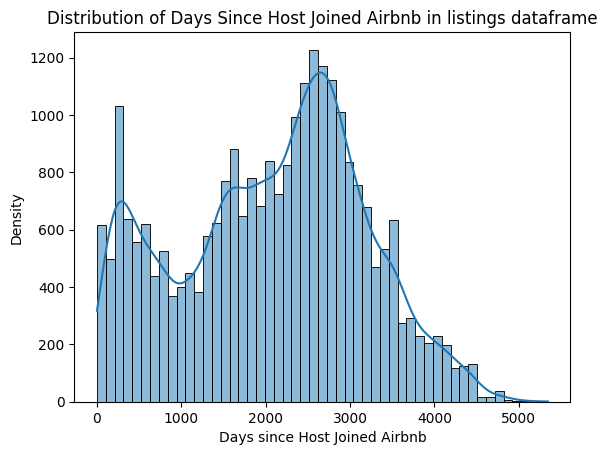

In [ ]:
listings_prep = calculate_days_since_host_01(listings.copy())

# Assuming "listings" is your dataframe with the "days_since_host" column
sns.histplot(
    data=listings_prep,
    x="days_since_host",
    kde=True,  # Add a kernel density estimation line
)

# Customize the plot
plt.xlabel("Days since Host Joined Airbnb")
plt.ylabel("Density")
plt.title("Distribution of Days Since Host Joined Airbnb in listings dataframe")
plt.show()

In [ ]:
listings_prep["host_response_time"].value_counts(dropna=False)

host_response_time
within an hour        18242
NaN                    3624
within a few hours     2262
within a day           1350
a few days or more      840
Name: count, dtype: int64

In [ ]:
listings_prep['host_response_time'] = (
    listings_prep['host_response_time']
    .str.lower()  # Convert to lowercase
    .str.replace(' ', '_')  # Replace spaces with underscores
    .str.normalize('NFKD')  # Normalize to decompose accented characters
    .str.encode('ascii', errors='ignore')  # Remove accents
    .str.decode('utf-8')  # Decode back to string
)

In [ ]:
nan_host = listings_prep[listings_prep["host_response_rate"].isna()][['host_id','host_since','host_name','host_response_time', 'host_response_rate', 'host_acceptance_rate','calculated_host_listings_count']].copy()
nan_host[nan_host.calculated_host_listings_count>1]

host_id host_since     host_name host_response_time  \
17        647454 2011-05-31      Fernando                NaN   
79       5870021 2013-04-10        Héctor                NaN   
89       6409883 2013-05-15          Pato                NaN   
105      6409883 2013-05-15          Pato                NaN   
127      6373011 2013-05-13  La Casita DF                NaN   
...          ...        ...           ...                ...   
26118  534496789 2023-08-29     Hosteando                NaN   
26146  108286078 2016-12-23          Juan                NaN   
26200   98946549 2016-10-09           Max                NaN   
26275  402663752 2021-05-21     Elizabeth                NaN   
26307  521411591 2023-06-22          Pepo                NaN   

      host_response_rate host_acceptance_rate  calculated_host_listings_count  
17                   NaN                  NaN                               3  
79                   NaN                  93%                               5  
89                   NaN                  NaN                               2  
105                  NaN                  NaN                               2  
127                  NaN                  NaN                               2  
...                  ...                  ...                             ...  
26118                NaN                  NaN                               3  
26146                NaN                  NaN                               2  
26200                NaN                  NaN                               2  
26275                NaN                  NaN                               2  
26307                NaN                  NaN                               4  

[1102 rows x 7 columns]

In [ ]:
print('No. of hosts with not enough information:', len(nan_host))

No. of hosts with not enough information: 3624


Does the lack of information propagate throughout properties?

In [ ]:
listings_prep[listings_prep['host_id']==5870021][['host_id','host_name','host_response_time', 'host_response_rate', 'host_acceptance_rate']]

host_id host_name host_response_time host_response_rate  \
79   5870021    Héctor                NaN                NaN   
225  5870021    Héctor                NaN                NaN   
260  5870021    Héctor                NaN                NaN   
263  5870021    Héctor                NaN                NaN   
409  5870021    Héctor                NaN                NaN   

    host_acceptance_rate  
79                   93%  
225                  93%  
260                  93%  
263                  93%  
409                  93%

For this time we'll remove the columns, and leave the task of exploring inputting solutions for the missing values for a later analysis.

In [ ]:
listings_prep=listings_prep.dropna(subset=['host_response_time', 'host_response_rate', 'host_acceptance_rate'])

In [ ]:
listings_prep["host_response_rate"].value_counts(dropna=False)

host_response_rate
100%    17507
99%      1041
90%       530
0%        376
98%       245
        ...  
11%         2
73%         2
4%          1
12%         1
47%         1
Name: count, Length: 66, dtype: int64

In [ ]:
listings_prep["host_acceptance_rate"].value_counts(dropna=False)

host_acceptance_rate
100%    11081
99%      3289
98%      1430
97%       800
96%       591
        ...  
31%         2
54%         1
37%         1
6%          1
48%         1
Name: count, Length: 94, dtype: int64

In [ ]:
def convert_rate_to_float_02(rate_str):
  # Remove the percentage symbol and convert to float
  rate_float = float(rate_str.strip("%"))
  # Divide by 100 to scale between 0 and 1
  return rate_float / 100

# Apply the function to both columns using vectorized operations
listings_prep["host_response_rate"] = listings_prep["host_response_rate"].apply(convert_rate_to_float_02)
listings_prep["host_acceptance_rate"] = listings_prep["host_acceptance_rate"].apply(convert_rate_to_float_02)

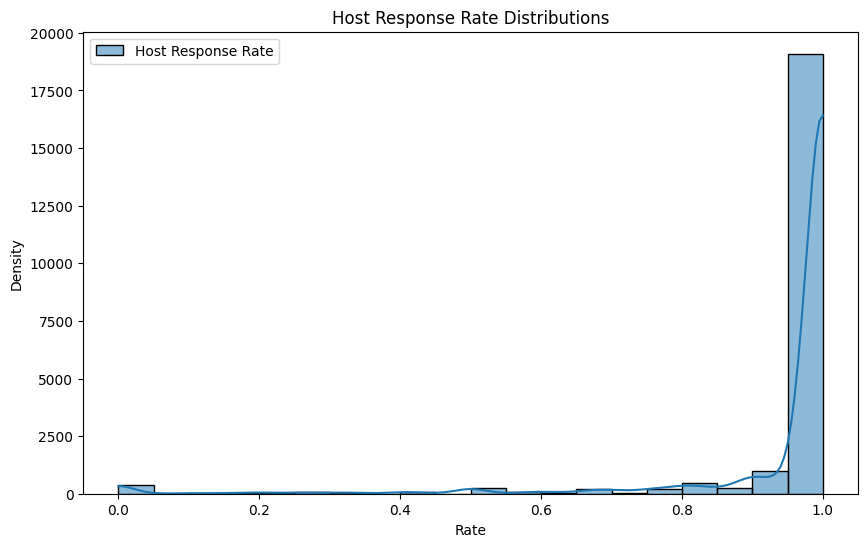

In [ ]:
plt.figure(figsize=(10, 6))

# Plot the distribution for 'host_response_rate'
sns.histplot(
    data=listings_prep,
    x="host_response_rate",
    kde=True,  # Add a kernel density estimation line
    label='Host Response Rate',
    bins = 20,
)

# Add labels and title
plt.xlabel('Rate')
plt.ylabel('Density')
plt.title('Host Response Rate Distributions')

# Show legend
plt.legend()

# Show the plot
plt.show()

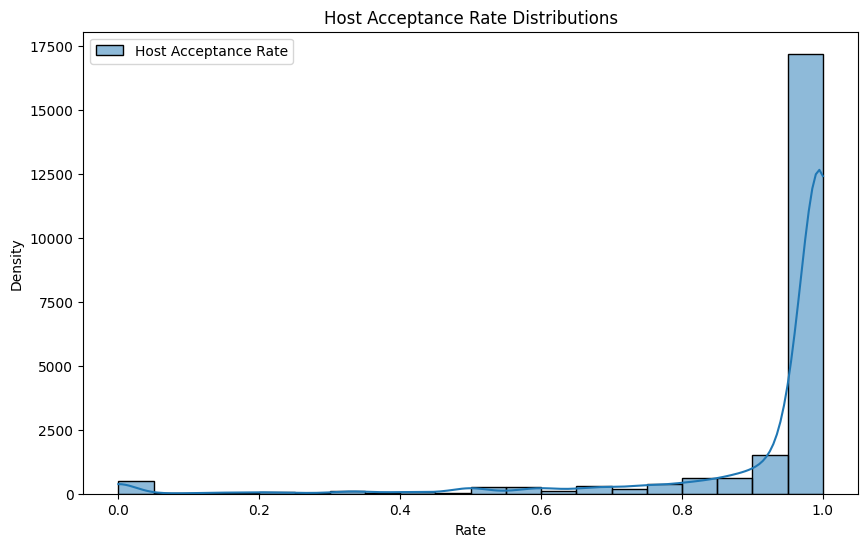

In [ ]:
plt.figure(figsize=(10, 6))

# Plot the distribution for 'host_acceptance_rate' on the same axes
sns.histplot(
    data=listings_prep,
    x="host_acceptance_rate",
    kde=True,  # Add a kernel density estimation line
    label='Host Acceptance Rate',
    bins=20
)

# Add labels and title
plt.xlabel('Rate')
plt.ylabel('Density')
plt.title('Host Acceptance Rate Distributions')

# Show legend
plt.legend()

# Show the plot
plt.show()

After reading what [response rate and acceptance rate mean](https://community.withairbnb.com/t5/Airbnb-updates/Understanding-Response-Rate-and-Acceptance-Rate/m-p/761075) we believe it's a good choice to leave out units from hosts that do not respond/accept their requests.

In [ ]:
listings_prep["host_response_rate"].describe()

count    22304.000000
mean         0.949161
std          0.168606
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: host_response_rate, dtype: float64

In [ ]:
listings_prep["host_acceptance_rate"].describe()

count    22304.000000
mean         0.924515
std          0.188493
min          0.000000
25%          0.960000
50%          0.990000
75%          1.000000
max          1.000000
Name: host_acceptance_rate, dtype: float64

In [ ]:
listings_prep=listings_prep[listings_prep.host_response_rate>0]
listings_prep=listings_prep[listings_prep.host_acceptance_rate>0]

In [ ]:
listings_prep["host_is_superhost"].value_counts(dropna=False)

host_is_superhost
f      11555
t       9160
NaN      888
Name: count, dtype: int64

In [ ]:
listings_prep=listings_prep.dropna(subset=['host_is_superhost'])

In [ ]:
listings_prep['host_is_superhost']=listings_prep['host_is_superhost']=='t'

In [ ]:
listings_prep["host_is_superhost"].value_counts(dropna=False)

host_is_superhost
False    11555
True      9160
Name: count, dtype: int64

In [ ]:
listings_prep["host_total_listings_count"].value_counts(dropna=False)

host_total_listings_count
1      3184
2      2390
3      1908
4      1430
5      1116
       ... 
177       1
83        1
112       1
173       1
75        1
Name: count, Length: 97, dtype: int64

In [ ]:
listings_prep["host_total_listings_count"].isna().sum()

0

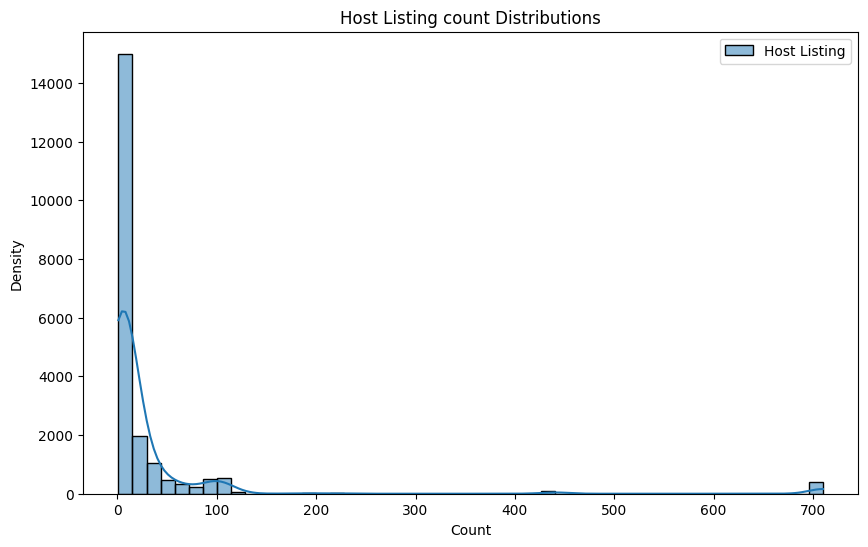

In [ ]:
plt.figure(figsize=(10, 6))

# Plot the distribution for 'host_acceptance_rate' on the same axes
sns.histplot(
    data=listings_prep,
    x="host_total_listings_count",
    kde=True,  # Add a kernel density estimation line
    label='Host Listing',
    bins=50
)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Density')
plt.title('Host Listing count Distributions')

# Show legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
listings_prep["host_total_listings_count"].describe()

count    20715.000000
mean        32.442385
std        103.744536
min          1.000000
25%          2.000000
50%          6.000000
75%         18.000000
max        710.000000
Name: host_total_listings_count, dtype: float64

In [ ]:
listings_prep["host_verifications"].value_counts(dropna=False)

host_verifications
['email', 'phone']                  15807
['email', 'phone', 'work_email']     2912
['phone']                            1921
['phone', 'work_email']                64
[]                                      9
['email']                               2
Name: count, dtype: int64

In [ ]:
import ast

listings_prep['host_verifications']=listings_prep['host_verifications'].apply(ast.literal_eval)

In [ ]:
verifications_df=listings_prep['host_verifications'].str.join('|').str.get_dummies().add_prefix('host_verifications_')
verifications_df

host_verifications_email  host_verifications_phone  \
1                             1                         1   
2                             1                         1   
3                             1                         1   
5                             1                         1   
6                             1                         1   
...                         ...                       ...   
26312                         0                         1   
26313                         1                         1   
26314                         1                         1   
26315                         1                         1   
26317                         1                         1   

       host_verifications_work_email  
1                                  0  
2                                  0  
3                                  0  
5                                  1  
6                                  0  
...                              ...  
26312                              0  
26313                              0  
26314                              0  
26315                              0  
26317                              0  

[20715 rows x 3 columns]

In [ ]:
listings_prep = pd.concat([listings_prep, verifications_df], axis=1)

In [ ]:
listings_prep['host_has_profile_pic']=listings_prep['host_has_profile_pic']=='t'
listings_prep["host_has_profile_pic"].value_counts(dropna=False)

host_has_profile_pic
True     20470
False      245
Name: count, dtype: int64

In [ ]:
listings_prep['host_identity_verified']=listings_prep['host_identity_verified']=='t'
listings_prep["host_identity_verified"].value_counts(dropna=False)

host_identity_verified
True     20519
False      196
Name: count, dtype: int64

## 2. Location Columns

In [ ]:
listings_prep['neighbourhood_cleansed'] = (
    listings_prep['neighbourhood_cleansed']
    .str.lower()  # Convert to lowercase
    .str.replace(' ', '_')  # Replace spaces with underscores
    .str.normalize('NFKD')  # Normalize to decompose accented characters
    .str.encode('ascii', errors='ignore')  # Remove accents
    .str.decode('utf-8')  # Decode back to string
)

In [ ]:
listings_prep["neighbourhood_cleansed"].value_counts(dropna=False)

neighbourhood_cleansed
cuauhtemoc                9735
miguel_hidalgo            3705
benito_juarez             2460
coyoacan                  1279
alvaro_obregon             798
venustiano_carranza        586
tlalpan                    585
gustavo_a._madero          342
cuajimalpa_de_morelos      334
iztacalco                  274
azcapotzalco               212
iztapalapa                 194
xochimilco                  98
la_magdalena_contreras      68
tlahuac                     31
milpa_alta                  14
Name: count, dtype: int64

In [ ]:
listings_prep['latitude'].isna().sum()

0

In [ ]:
listings_prep['longitude'].isna().sum()

0

## 3. Listing details

In [ ]:
listings_prep['property_type'] = (
    listings_prep['property_type']
    .str.lower()  # Convert to lowercase
    .str.replace(' ', '_')  # Replace spaces with underscores
    .str.normalize('NFKD')  # Normalize to decompose accented characters
    .str.encode('ascii', errors='ignore')  # Remove accents
    .str.decode('utf-8')  # Decode back to string
)

In [ ]:
listings_prep["property_type"].value_counts(dropna=False)

property_type
entire_rental_unit             7766
entire_condo                   2980
private_room_in_rental_unit    2020
private_room_in_home           1600
entire_loft                    1301
                               ... 
entire_in-law                     1
castle                            1
private_room_in_barn              1
entire_home/apt                   1
tent                              1
Name: count, Length: 83, dtype: int64

In [ ]:
listings_prep[listings_prep['property_type'].str.contains('shared', case=False, na=False)]["property_type"]

165            shared_room_in_loft
410            shared_room_in_home
465      shared_room_in_guesthouse
563          shared_room_in_hostel
607          shared_room_in_hostel
                   ...            
25778    shared_room_in_guesthouse
25791         shared_room_in_condo
25835    shared_room_in_guesthouse
25841    shared_room_in_guesthouse
25915          shared_room_in_tent
Name: property_type, Length: 258, dtype: object

In [ ]:
listings_prep[listings_prep['property_type'].str.contains('hotel', case=False, na=False)]["property_type"].value_counts(dropna=False)

property_type
room_in_hotel                    367
room_in_boutique_hotel           155
room_in_aparthotel                85
shared_room_in_boutique_hotel      4
shared_room_in_hotel               1
Name: count, dtype: int64

In [ ]:
listings_prep['room_type'] = (
    listings_prep['room_type']
    .str.lower()  # Convert to lowercase
    .str.replace(' ', '_')  # Replace spaces with underscores
    .str.replace('/', '_')  # Replace spaces with underscores
    .str.normalize('NFKD')  # Normalize to decompose accented characters
    .str.encode('ascii', errors='ignore')  # Remove accents
    .str.decode('utf-8')  # Decode back to string
)
listings_prep["room_type"].value_counts(dropna=False)

room_type
entire_home_apt    14118
private_room        6247
shared_room          258
hotel_room            92
Name: count, dtype: int64

In [ ]:
listings_prep["room_type"].value_counts(dropna=False)

room_type
entire_home_apt    14118
private_room        6247
shared_room          258
hotel_room            92
Name: count, dtype: int64

The first part of the property_type (same as 'room_type') is the "type of place the guest will have":
<div>
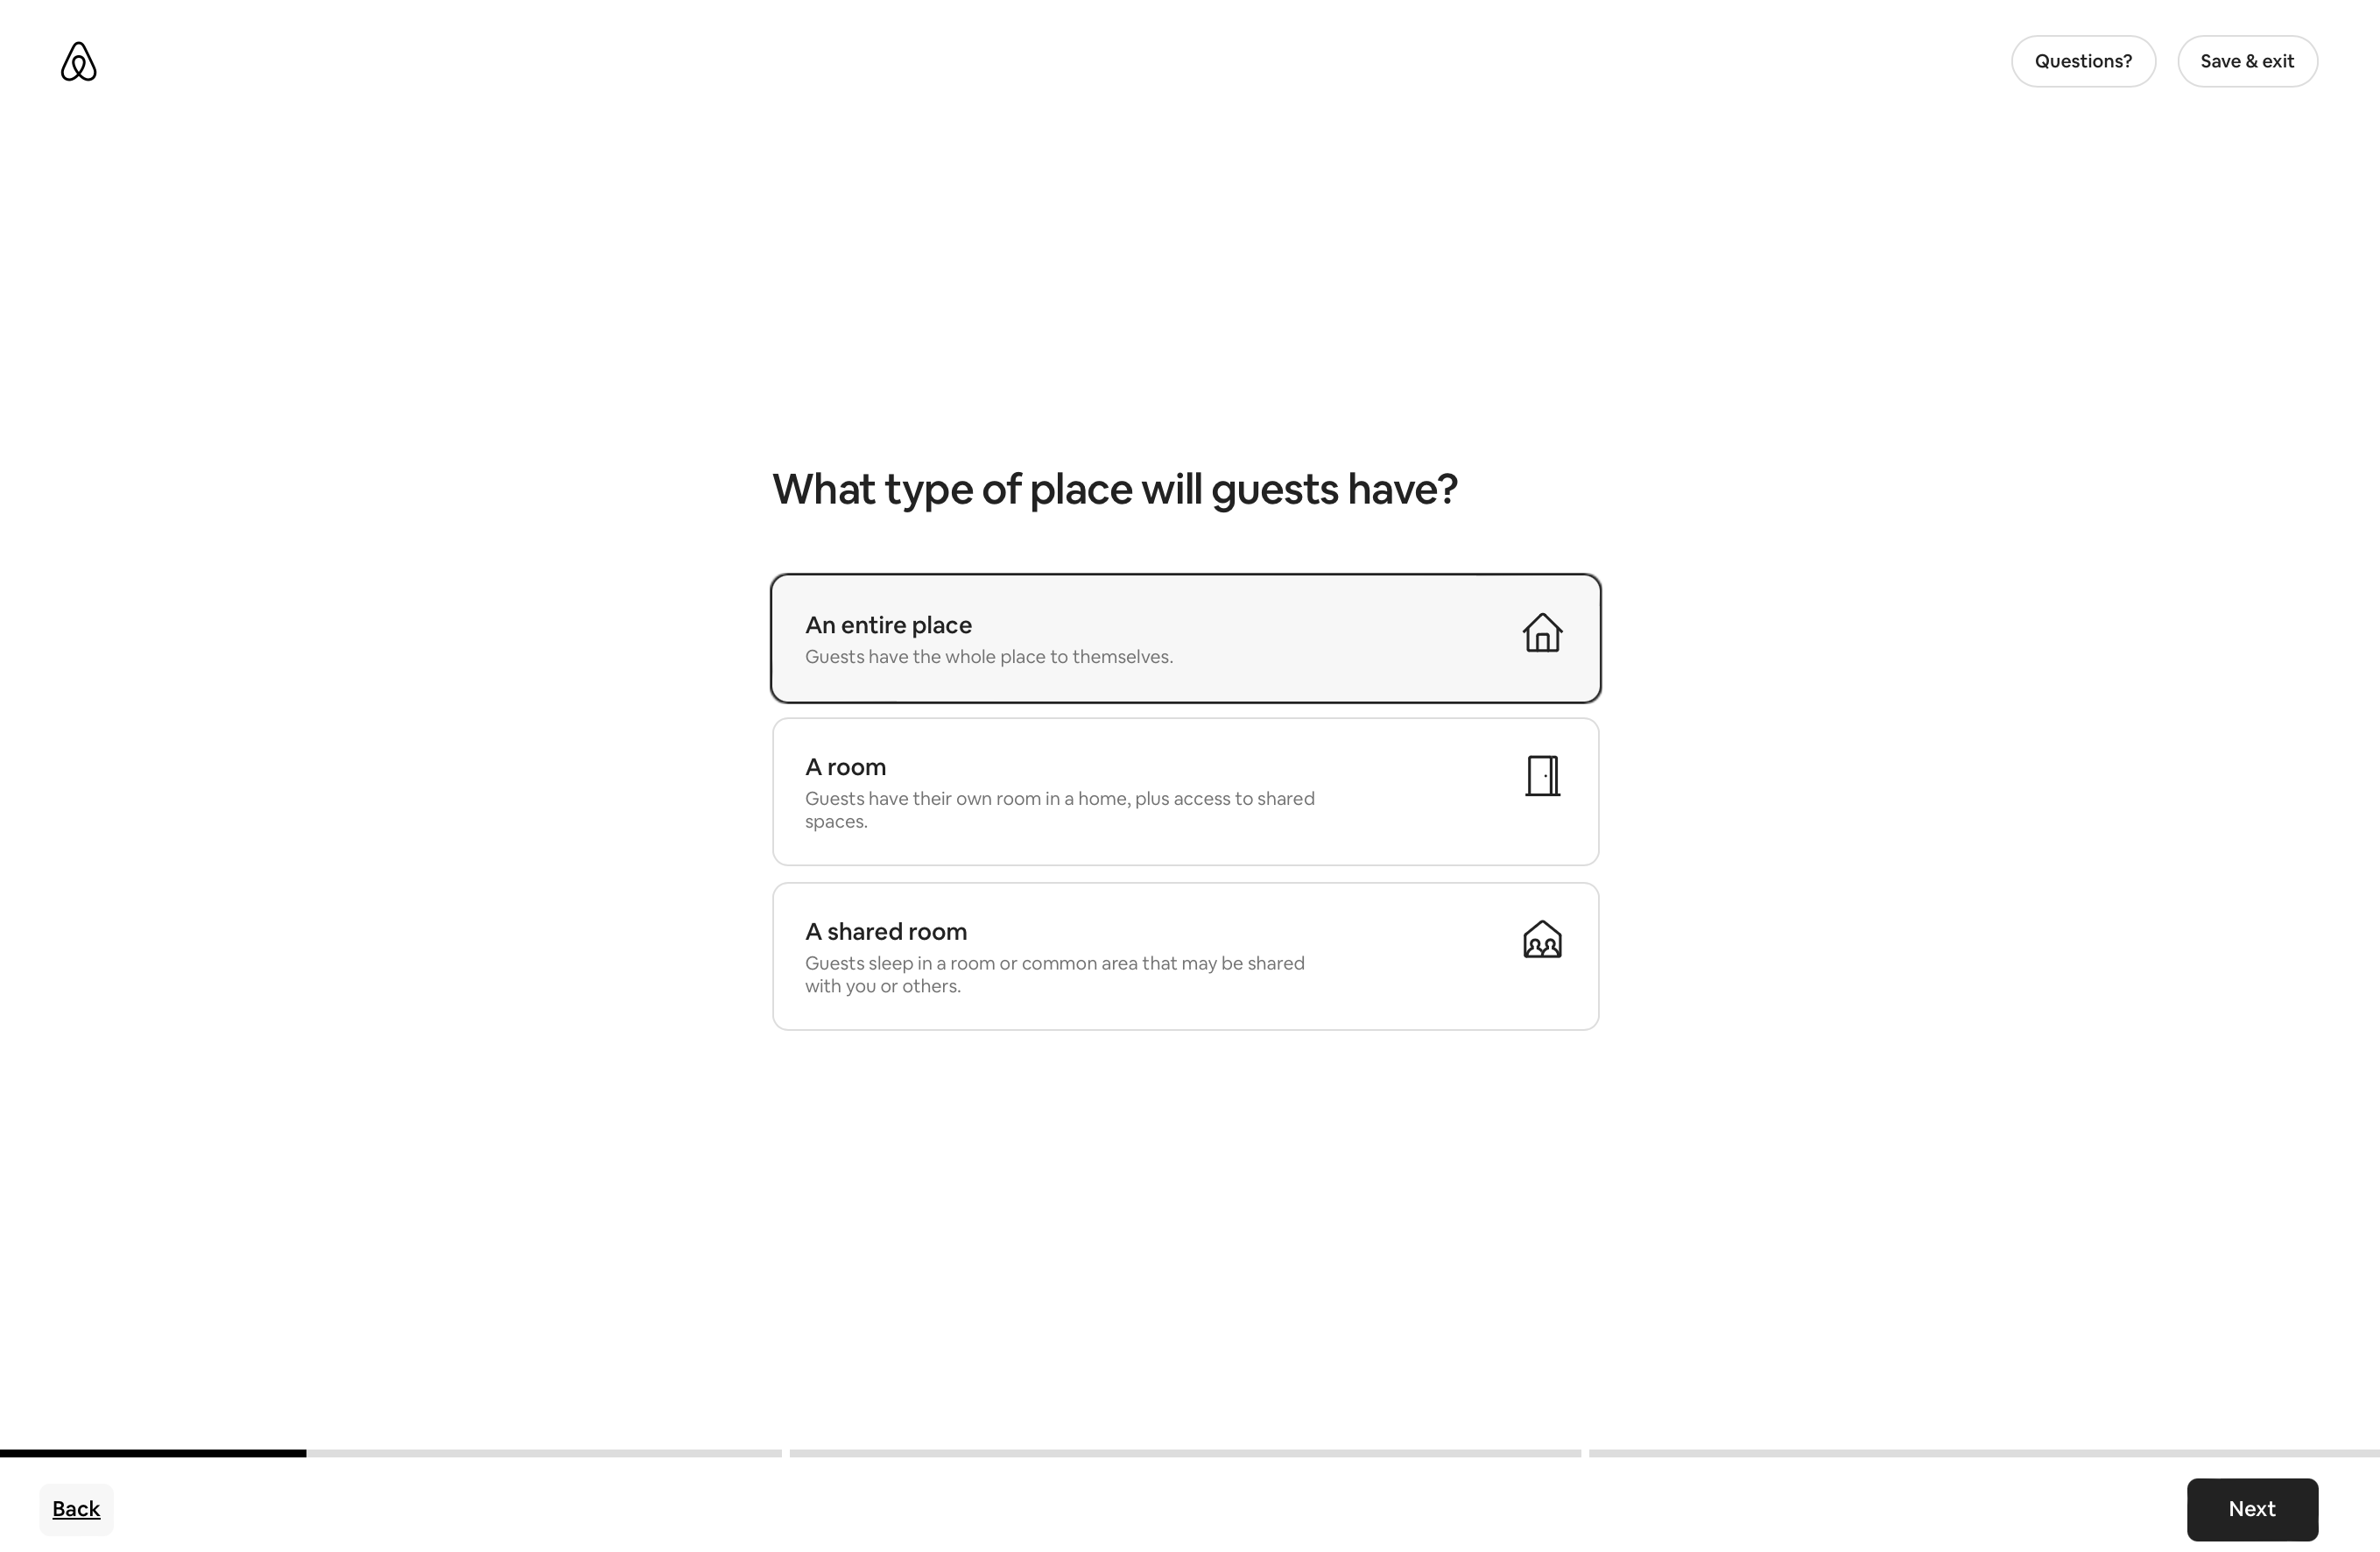
</div>

Let's extract the place description:
<div>
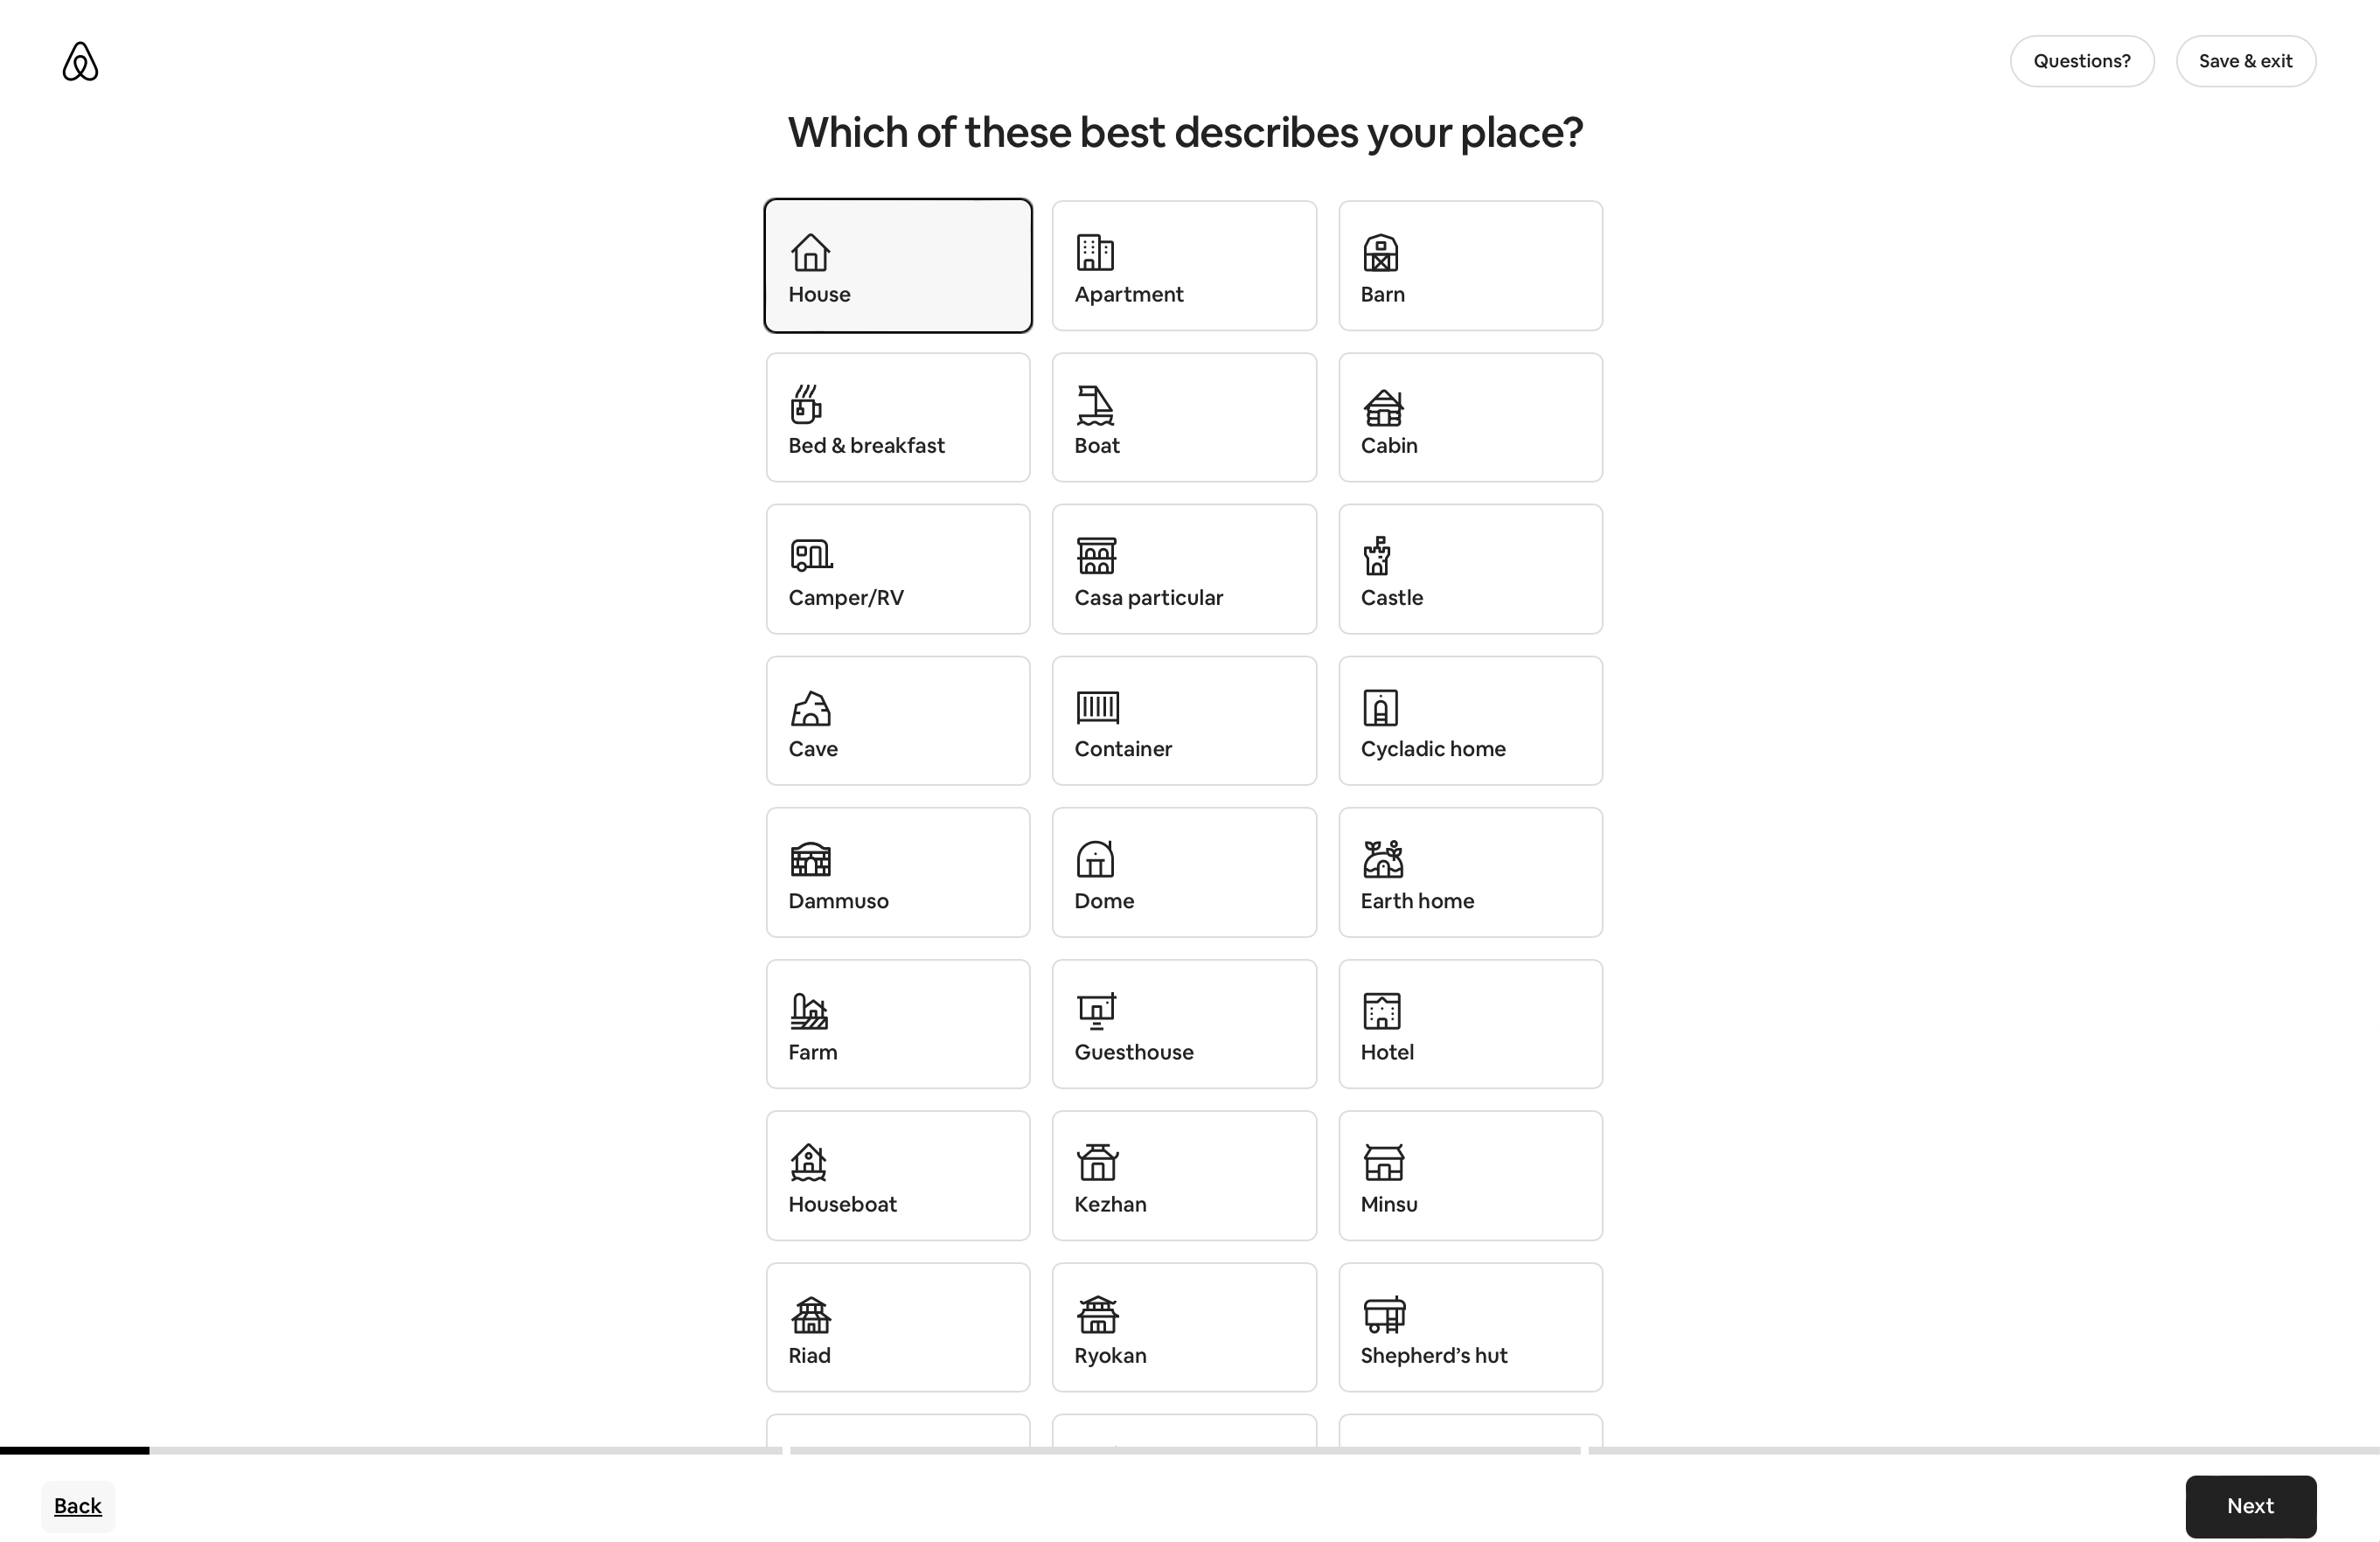
</div>

In [ ]:
def remove_prefix(value):
    prefixes_to_remove = ['shared_room_in_', 'entire_', 'private_room_in_', 'room_in_']
    
    for prefix in prefixes_to_remove:
        if value.startswith(prefix):
            return value[len(prefix):].strip()
    
    return value

# Specify the name of the column you want to modify
column_name = 'property_type'

# Apply the remove_prefix function to the 'property_type' column
listings_prep['property_description']=listings_prep[column_name].apply(remove_prefix)
listings_prep["property_description"].value_counts(dropna=False)

property_description
rental_unit           9810
condo                 3650
home                  2261
loft                  1410
serviced_apartment    1104
guest_suite            422
hotel                  368
guesthouse             329
bed_and_breakfast      247
casa_particular        236
boutique_hotel         159
townhouse              130
hostel                 111
vacation_home          107
aparthotel              85
tiny_home               63
shipping_container      48
cabin                   28
private_room            28
place                   23
holiday_park            17
villa                   12
hut                     12
cottage                 12
bungalow                 6
dome                     4
nature_lodge             4
tent                     4
campsite                 3
earthen_home             3
shared_room              3
tipi                     3
farm_stay                2
pension                  1
treehouse                1
ranch                    1
dorm   

In [ ]:
listings_prep["accommodates"].value_counts(dropna=False)

accommodates
2     8201
4     4745
1     1982
3     1814
6     1541
5     1116
8      438
7      254
16     179
10     173
12      86
9       77
14      39
11      28
15      24
13      18
Name: count, dtype: int64

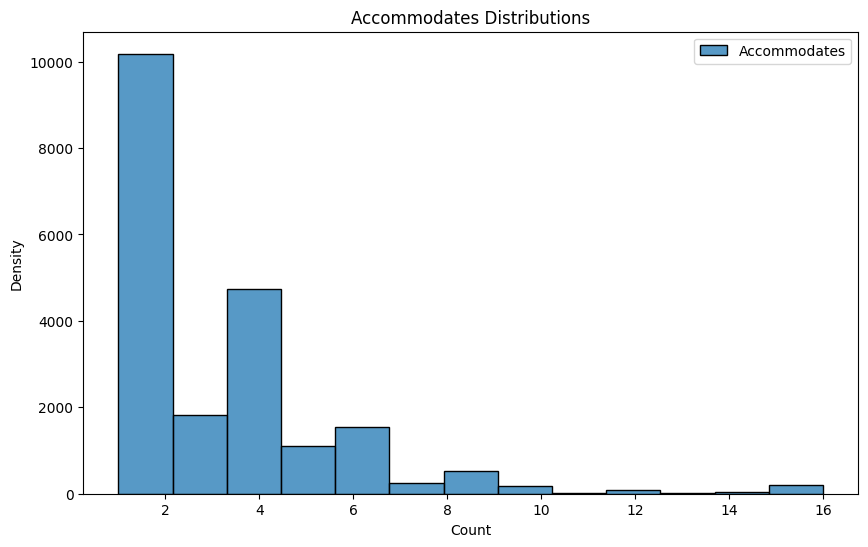

In [ ]:
plt.figure(figsize=(10, 6))

# Plot the distribution for 'host_acceptance_rate' on the same axes
sns.histplot(
    data=listings_prep,
    x="accommodates",
    label='Accommodates',
    bins=13
)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Density')
plt.title('Accommodates Distributions')

# Show legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
listings_prep["bathrooms"].value_counts(dropna=False)

bathrooms
NaN    20715
Name: count, dtype: int64

In [ ]:
listings_prep["bathrooms_text"].value_counts(dropna=False)

bathrooms_text
1 bath               8696
2 baths              3763
1 private bath       2393
1 shared bath        1894
1.5 baths            1145
2.5 baths             716
1.5 shared baths      416
3 baths               377
2 shared baths        282
3.5 baths             204
2.5 shared baths      123
4 baths                98
3 shared baths         84
4.5 baths              76
4 shared baths         56
5 shared baths         48
3.5 shared baths       38
5 baths                36
5.5 baths              26
6 baths                24
0 baths                21
NaN                    21
Half-bath              20
4.5 shared baths       19
7 baths                18
0 shared baths         16
8 shared baths         13
6 shared baths         13
6.5 baths              12
8 baths                12
Shared half-bath        7
7.5 baths               6
10 baths                5
Private half-bath       5
8.5 baths               4
9 baths                 4
12 baths                3
16 baths               

In [ ]:
listings_prep["bathrooms_text"] = listings_prep["bathrooms_text"].apply(lambda x: '0.5 bath' if x=='Half-bath' else ('0.5 shared bath'  if x=='Shared half-bath' else ('0.5 private bath'  if x=='Private half-bath' else x)))

In [ ]:
listings_prep["bathrooms_text"].value_counts(dropna=False)

bathrooms_text
1 bath              8696
2 baths             3763
1 private bath      2393
1 shared bath       1894
1.5 baths           1145
2.5 baths            716
1.5 shared baths     416
3 baths              377
2 shared baths       282
3.5 baths            204
2.5 shared baths     123
4 baths               98
3 shared baths        84
4.5 baths             76
4 shared baths        56
5 shared baths        48
3.5 shared baths      38
5 baths               36
5.5 baths             26
6 baths               24
0 baths               21
NaN                   21
0.5 bath              20
4.5 shared baths      19
7 baths               18
0 shared baths        16
8 shared baths        13
6 shared baths        13
6.5 baths             12
8 baths               12
0.5 shared bath        7
7.5 baths              6
10 baths               5
0.5 private bath       5
8.5 baths              4
9 baths                4
12 baths               3
16 baths               3
12.5 baths             2
11 baths  

In [ ]:
# Specify the name of the column you want to extract information from
column_name = 'bathrooms_text'  # Replace with your actual column name

# Drop rows with NaN values in the specified column
listings_prep = listings_prep.dropna(subset=[column_name])

# Extract bathroom quantity and type into new columns
listings_prep[['bathroom_qty', 'bathroom_type']] = listings_prep[column_name].str.extract(r'(\d*\.?\d+)?\s*([a-zA-Z\s]+)?')

# Remove the last "s" from all values in the specified column
listings_prep['bathroom_type'] = listings_prep['bathroom_type'].str.rstrip('s').str.replace(' ', '_')

# Convert 'bathroom_qty' to float
listings_prep['bathroom_qty'] = listings_prep['bathroom_qty'].astype(float)

# Display the updated DataFrame
listings_prep[['bathrooms_text', 'bathroom_qty', 'bathroom_type']].head()

bathrooms_text  bathroom_qty bathroom_type
1      1.5 baths           1.5          bath
2      2.5 baths           2.5          bath
3         1 bath           1.0          bath
5      5.5 baths           5.5          bath
6         1 bath           1.0          bath

In [ ]:
listings_prep["bathroom_qty"].value_counts(dropna=False)

bathroom_qty
1.0     12983
2.0      4045
1.5      1561
2.5       839
3.0       461
3.5       242
4.0       154
4.5        95
5.0        84
6.0        37
0.0        37
0.5        32
5.5        26
8.0        25
7.0        18
6.5        12
10.0        6
7.5         6
8.5         4
9.0         4
12.0        4
16.0        3
13.0        2
12.5        2
18.0        1
14.5        1
32.0        1
9.5         1
11.5        1
49.0        1
14.0        1
15.0        1
11.0        1
46.0        1
20.0        1
52.0        1
Name: count, dtype: int64

I thought that having too many baths was a mistake in the data, but doing some reserach in the app i found out you can book entire hotels with those big numbers of baths (and it does affect the price of course):
<div>
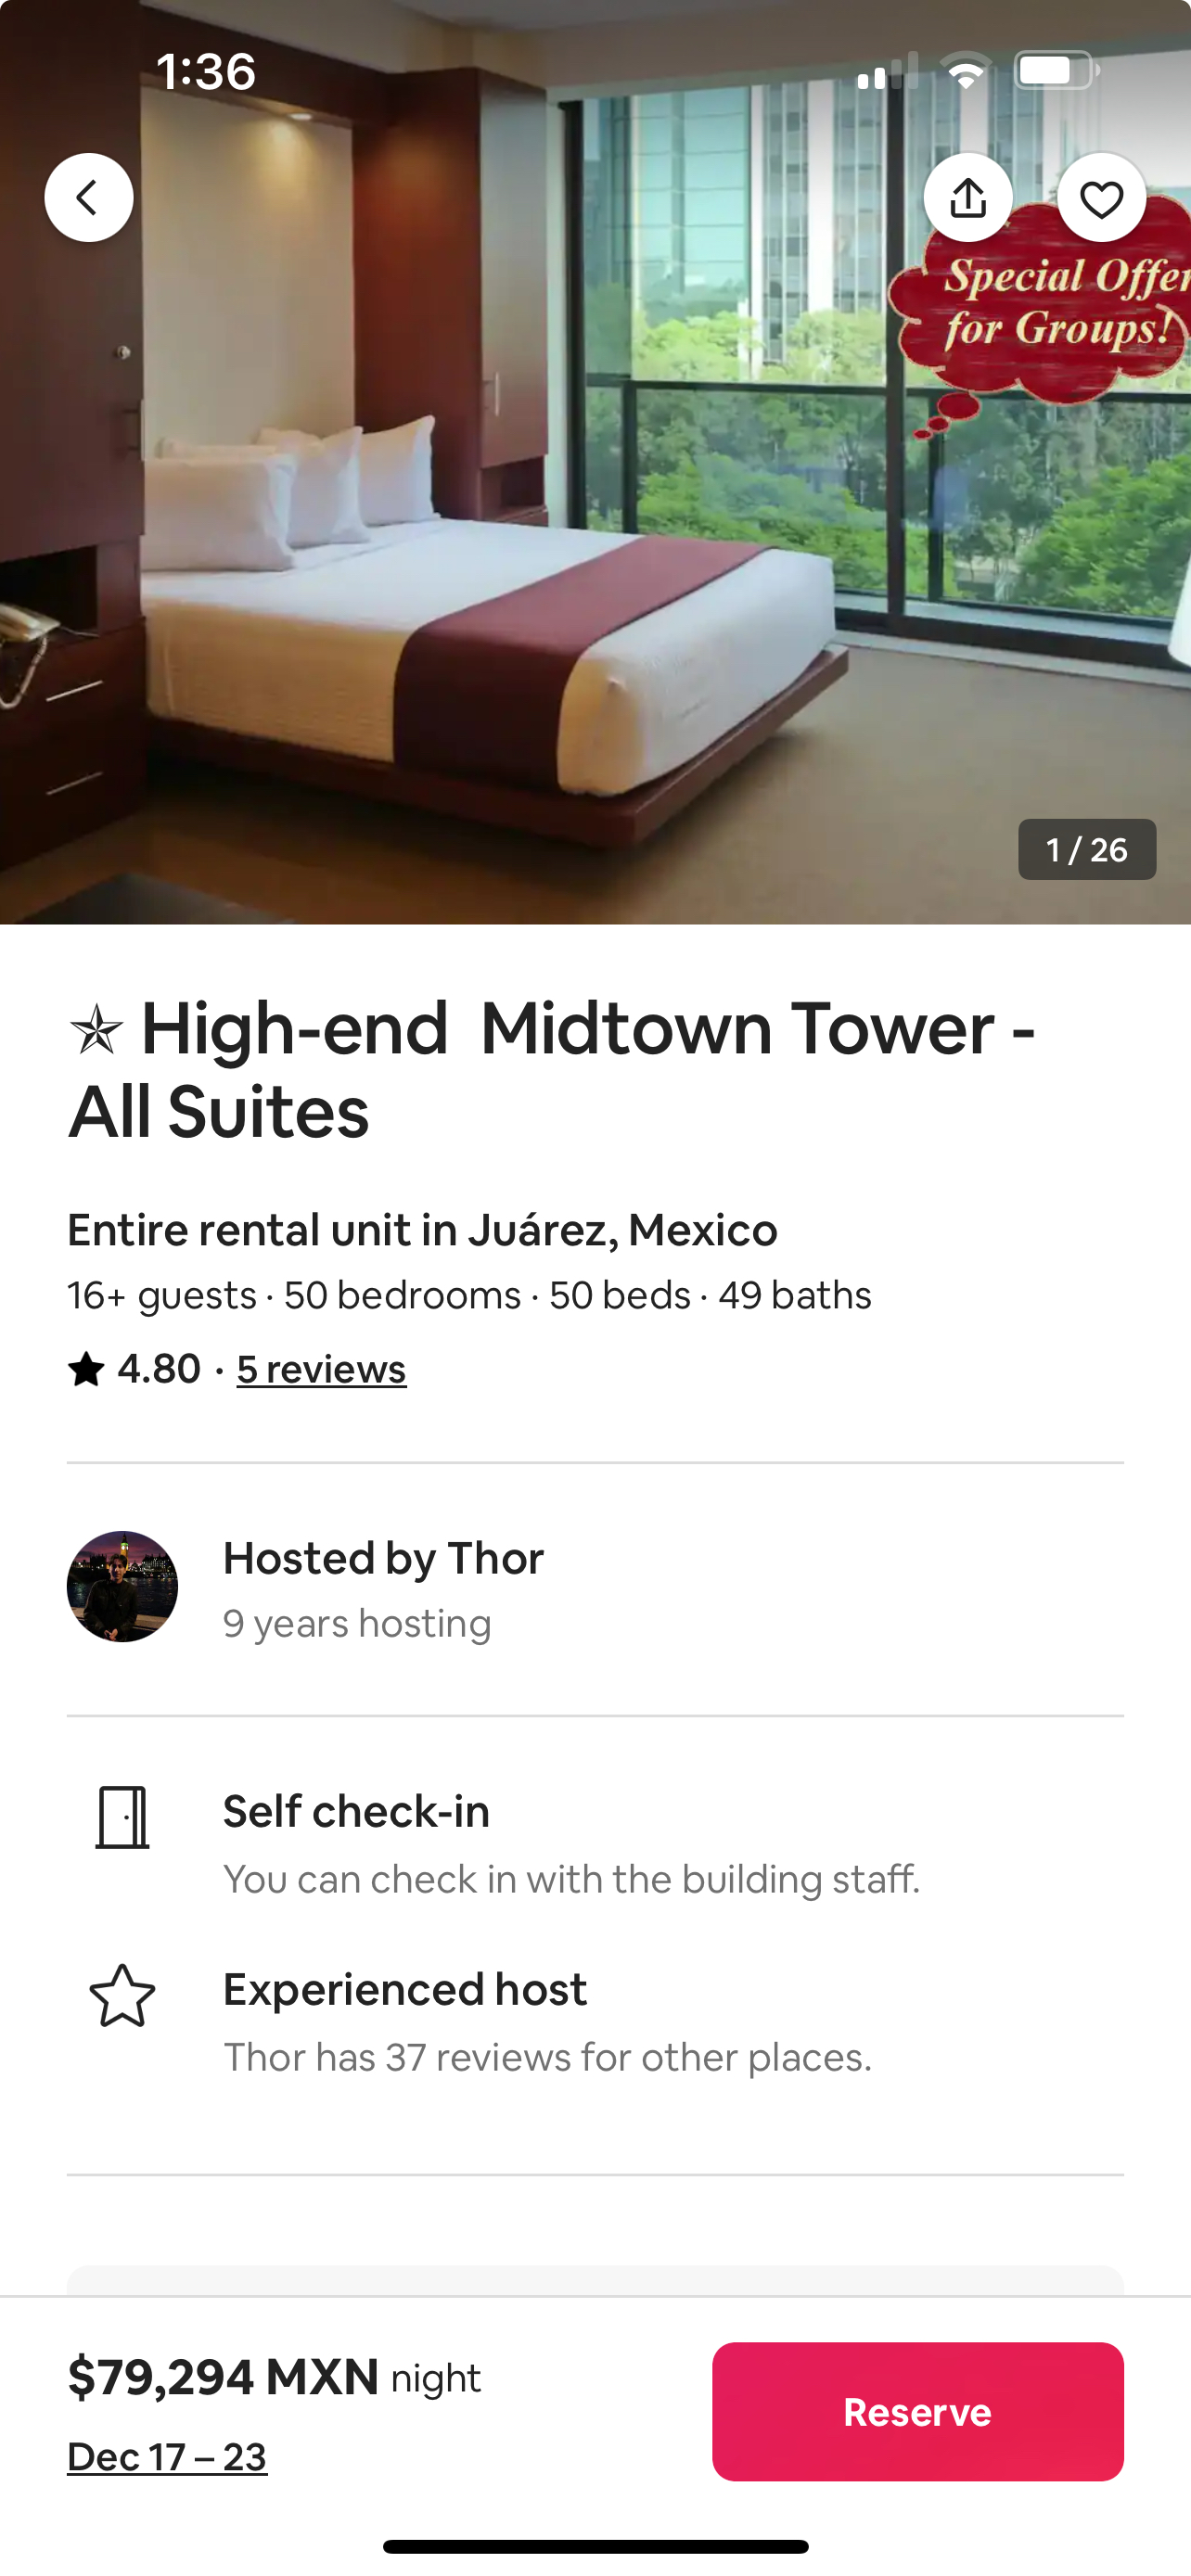
</div>

In [ ]:
listings_prep["bathroom_type"].value_counts(dropna=False)

bathroom_type
bath            15284
shared_bath      3012
private_bath     2398
Name: count, dtype: int64

In [ ]:
listings_prep["bedrooms"].value_counts(dropna=False)

bedrooms
1.0     7686
2.0     5610
NaN     5326
3.0     1457
4.0      309
5.0      118
6.0       79
7.0       34
8.0       20
9.0       11
10.0      11
11.0       6
12.0       6
16.0       4
15.0       4
18.0       3
13.0       3
50.0       2
14.0       2
23.0       1
25.0       1
22.0       1
Name: count, dtype: int64

In [ ]:
listings_prep[listings_prep["bedrooms"].isna()][['beds']].value_counts(dropna=False)

beds
1.0     4295
2.0      697
3.0      106
NaN       60
4.0       54
5.0       30
12.0      17
9.0       15
7.0       12
16.0      10
6.0        9
8.0        6
18.0       5
11.0       3
17.0       2
10.0       2
22.0       1
35.0       1
40.0       1
Name: count, dtype: int64

In [ ]:
na_bedrooms=listings_prep[listings_prep["bedrooms"].isna()]
na_bedrooms[['room_type']].value_counts(dropna=False)

room_type      
private_room       4773
entire_home_apt     291
shared_room         257
hotel_room            5
Name: count, dtype: int64

In [ ]:
na_bedrooms[na_bedrooms["room_type"]=='entire_home_apt'][['property_description']].value_counts(dropna=False)

property_description
rental_unit             121
loft                     78
condo                    52
guest_suite              16
home                      5
place                     4
serviced_apartment        4
guesthouse                3
tiny_home                 3
campsite                  2
aparthotel                1
hut                       1
townhouse                 1
Name: count, dtype: int64

In [ ]:
na_bedrooms[(na_bedrooms["room_type"]=='entire_home_apt') & (na_bedrooms["property_description"]=="rental_unit")].head(2)

id                           listing_url       scrape_id  \
418  6126644  https://www.airbnb.com/rooms/6126644  20230922223244   
442  6287517  https://www.airbnb.com/rooms/6287517  20230922223244   

    last_scraped       source  \
418   2023-09-23  city scrape   
442   2023-09-23  city scrape   

                                                  name  \
418  Rental unit in Mexico City · ★4.81 · Studio · ...   
442  Rental unit in México · ★4.78 · Studio · 1 bed...   

                                           description  \
418  Unbeatable location in La Colonia Roma (one bl...   
442  Independent small studio, newly renovated perf...   

                                 neighborhood_overview  \
418  Colonia Roma has a remarkable Art Nouveau, ecl...   
442                                                NaN   

                                           picture_url   host_id  ...  \
418  https://a0.muscache.com/pictures/miso/Hosting-...   7838265  ...   
442  https://a0.muscache.com/pictures/87735614/bc1a...  32685771  ...   

    calculated_host_listings_count_private_rooms  \
418                                            0   
442                                            0   

    calculated_host_listings_count_shared_rooms reviews_per_month  \
418                                           0              1.01   
442                                           0              2.14   

    days_since_host host_verifications_email host_verifications_phone  \
418            3705                        1                        1   
442            3062                        1                        1   

     host_verifications_work_email  property_description  bathroom_qty  \
418                              0           rental_unit           1.0   
442                              0           rental_unit           1.0   

    bathroom_type  
418          bath  
442          bath  

[2 rows x 82 columns]

Seem to be studios: 

<div>
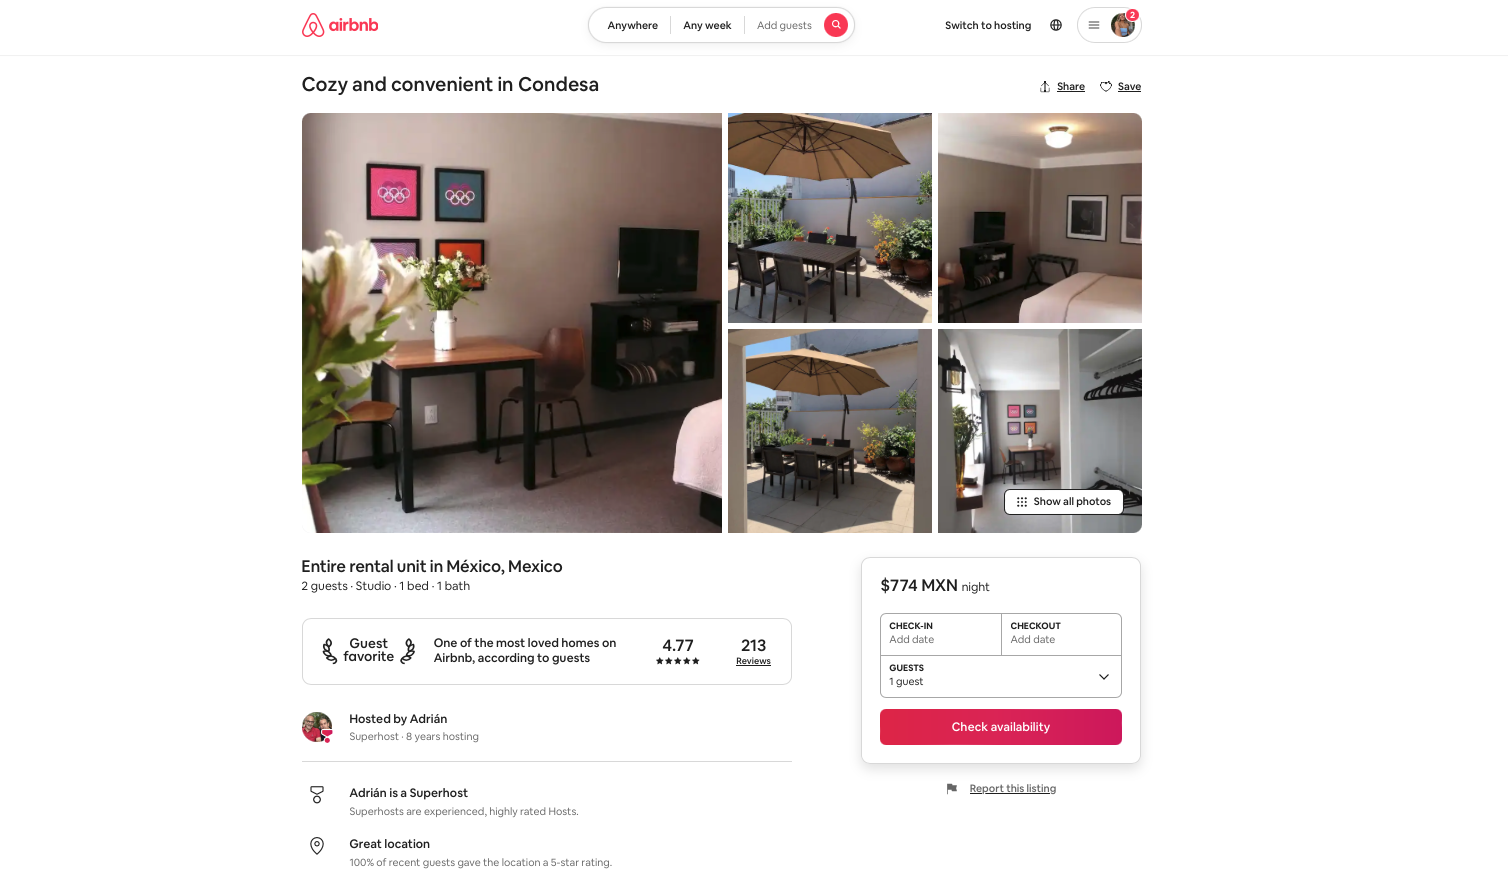
</div>

In [ ]:
listings_prep['bedrooms'] = listings_prep['bedrooms'].fillna(1)
listings_prep["bedrooms"].value_counts(dropna=False)

bedrooms
1.0     13012
2.0      5610
3.0      1457
4.0       309
5.0       118
6.0        79
7.0        34
8.0        20
10.0       11
9.0        11
11.0        6
12.0        6
16.0        4
15.0        4
18.0        3
13.0        3
50.0        2
14.0        2
23.0        1
25.0        1
22.0        1
Name: count, dtype: int64

In [ ]:
listings_prep["beds"].value_counts(dropna=False)

beds
1.0     9981
2.0     5853
3.0     2608
4.0     1107
5.0      456
6.0      190
NaN      121
7.0      106
9.0       60
8.0       59
12.0      33
10.0      28
16.0      21
11.0      15
13.0       9
18.0       8
14.0       7
15.0       5
21.0       4
17.0       4
22.0       3
19.0       3
25.0       2
50.0       2
32.0       2
40.0       1
35.0       1
20.0       1
36.0       1
28.0       1
45.0       1
61.0       1
Name: count, dtype: int64

In [ ]:
listings_prep[listings_prep["beds"].isna()].head()

id                            listing_url       scrape_id  \
51      844818    https://www.airbnb.com/rooms/844818  20230922223244   
96     1236668   https://www.airbnb.com/rooms/1236668  20230922223244   
396    6043473   https://www.airbnb.com/rooms/6043473  20230922223244   
1357  13600463  https://www.airbnb.com/rooms/13600463  20230922223244   
2056  17395772  https://www.airbnb.com/rooms/17395772  20230922223244   

     last_scraped       source  \
51     2023-09-23  city scrape   
96     2023-09-23  city scrape   
396    2023-09-23  city scrape   
1357   2023-09-23  city scrape   
2056   2023-09-23  city scrape   

                                                   name  \
51    Rental unit in Mexico City · ★4.78 · 1 bedroom...   
96    Rental unit in Mexico City · ★3.27 · 3 bedroom...   
396   Home in Mexico City · ★5.0 · 1 bedroom · 1 sha...   
1357  Rental unit in Mexico City · ★4.79 · 1 bedroom...   
2056  Home in Mexico City · ★4.55 · 1 bedroom · 1 pr...   

                                            description  \
51    I´ve got One Spacious Room with independent ba...   
96    Stay in a classic historic building with conte...   
396   La amplitud, ubicación y funcionalidad de nues...   
1357  <b>During your stay</b><br />la gerente de est...   
2056  <b>The space</b><br />Si buscas privacidad la ...   

                                  neighborhood_overview  \
51    I've been living in this hood for over 15 year...   
96                                                  NaN   
396   El barrio es sumamente tranquilo y seguro, ade...   
1357  Cerca de las mejores universidades del país IB...   
2056                                                NaN   

                                            picture_url   host_id  ...  \
51    https://a0.muscache.com/pictures/b019d9cb-6343...   4410326  ...   
96    https://a0.muscache.com/pictures/18621119/bac5...   5525131  ...   
396   https://a0.muscache.com/pictures/75268873/1d55...  12756313  ...   
1357  https://a0.muscache.com/pictures/prohost-api/H...  49735631  ...   
2056  https://a0.muscache.com/pictures/prohost-api/H...  15359500  ...   

     calculated_host_listings_count_private_rooms  \
51                                              1   
96                                              0   
396                                             5   
1357                                           18   
2056                                           43   

     calculated_host_listings_count_shared_rooms reviews_per_month  \
51                                             0              0.07   
96                                             0              0.09   
396                                            0              0.21   
1357                                           2              3.53   
2056                                           0              1.62   

     days_since_host host_verifications_email host_verifications_phone  \
51              3933                        1                        1   
96              3839                        1                        1   
396             3490                        1                        1   
1357            2860                        1                        1   
2056            3421                        1                        1   

      host_verifications_work_email  property_description  bathroom_qty  \
51                                0           rental_unit           1.0   
96                                0           rental_unit           2.0   
396                               0                  home           1.0   
1357                              0           rental_unit           0.5   
2056                              1                  home           1.0   

     bathroom_type  
51     shared_bath  
96            bath  
396    shared_bath  
1357  private_bath  
2056  private_bath  

[5 rows x 82 columns]

As some listings seem to have a bed and others not, we'll remove this datapoints for this time.

In [ ]:
listings_prep = listings_prep.dropna(subset=['beds'])

In [ ]:
listings_prep["amenities"].isna().sum()

0

Now, let's go to the amenities. We'll write the list of popular amenities in Mexico city:
<div>
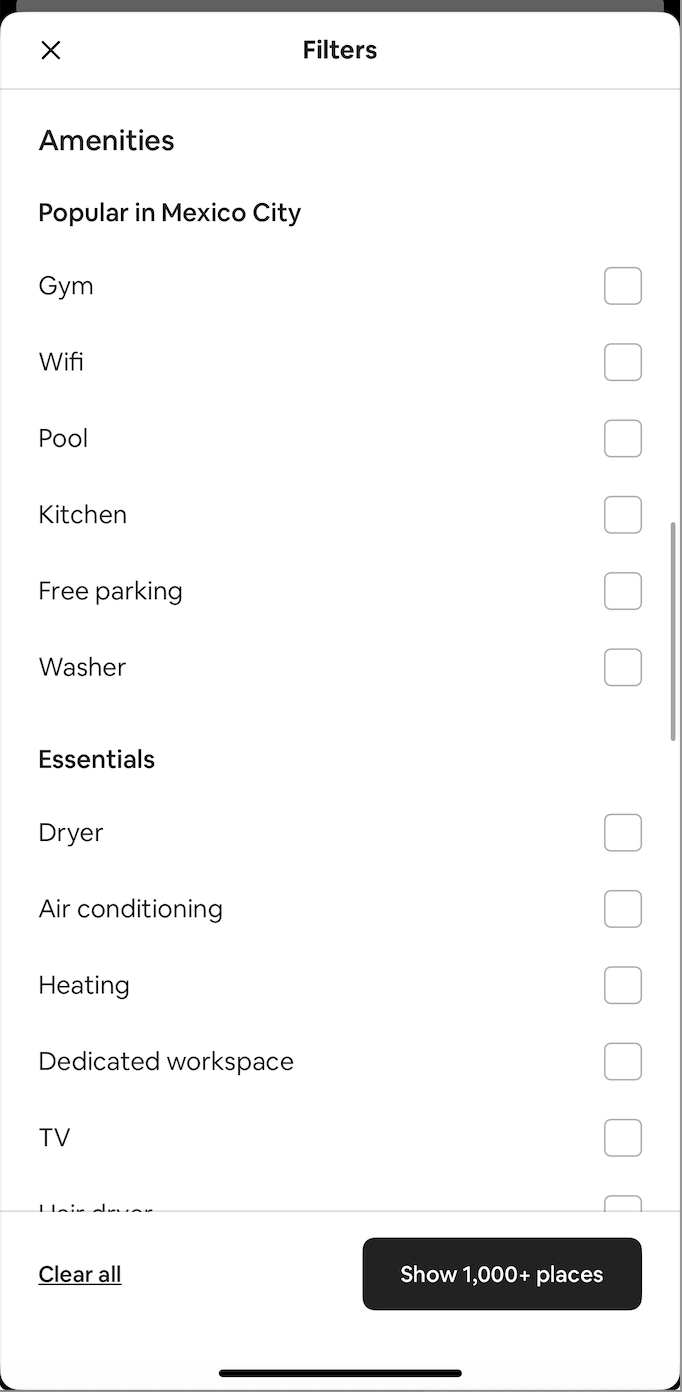
</div>

In [ ]:
amenities_list = ['gym','wifi','pool','kitchen','parking','washer','dryer','conditioning','heating','workspace',
             'tv','hair dryer','iron','hot tub','crib','king bed','bbq','breakfast','fireplace','smoking', 'coffee maker'
            ]

In [ ]:
df = listings_prep.copy()
df.head(1)

id                          listing_url       scrape_id last_scraped  \
1  611179  https://www.airbnb.com/rooms/611179  20230922223244   2023-09-23   

        source                                               name  \
1  city scrape  Condo in Mexico City · 1 bedroom · 2 beds · 1....   

                                         description  \
1  LOTS OF SPACE AND STYLE. ROMANTIC. <br />AMAZI...   

                               neighborhood_overview  \
1  Mexico City's historic center, declared a Worl...   

                                         picture_url  host_id  ...  \
1  https://a0.muscache.com/pictures/7734976/9633d...  1297488  ...   

  calculated_host_listings_count_private_rooms  \
1                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  \
1                                           0              0.01   

  days_since_host host_verifications_email host_verifications_phone  \
1            4359                        1                        1   

   host_verifications_work_email  property_description  bathroom_qty  \
1                              0                 condo           1.5   

  bathroom_type  
1          bath  

[1 rows x 82 columns]

In [ ]:
for amenity in amenities_list:
    df[amenity] = df['amenities'].str.contains(amenity, case=False).astype(int)

In [ ]:
df.head()

id                          listing_url       scrape_id last_scraped  \
1  611179  https://www.airbnb.com/rooms/611179  20230922223244   2023-09-23   
2  611337  https://www.airbnb.com/rooms/611337  20230922223244   2023-09-23   
3  613181  https://www.airbnb.com/rooms/613181  20230922223244   2023-09-23   
5   44616   https://www.airbnb.com/rooms/44616  20230922223244   2023-09-23   
6  628081  https://www.airbnb.com/rooms/628081  20230922223244   2023-09-23   

        source                                               name  \
1  city scrape  Condo in Mexico City · 1 bedroom · 2 beds · 1....   
2  city scrape  Condo in Mexico City · ★5.0 · 2 bedrooms · 4 b...   
3  city scrape  Rental unit in Mexico City · ★4.76 · 2 bedroom...   
5  city scrape  Home in Mexico City · ★4.58 · 5 bedrooms · 8 b...   
6  city scrape  Condo in Mexico City · ★4.86 · 1 bedroom · 1 b...   

                                         description  \
1  LOTS OF SPACE AND STYLE. ROMANTIC. <br />AMAZI...   
2  IDEAL FOR  2 COUPLES OR 4 FRIENDS <br />LOTS O...   
3  Couples history with comfort, playful elegance...   
5  A new concept of hosting in mexico through a b...   
6  “Super comfortable space to spend a few days i...   

                               neighborhood_overview  \
1  Mexico City's historic center, declared a Worl...   
2  Mexico City's historic center, declared a Worl...   
3  Casa Tezontle is in Mexico’s City Historic Dow...   
5                                                NaN   
6  The Roma/Condesa neighborhood has a lot to off...   

                                         picture_url  host_id  ... hair dryer  \
1  https://a0.muscache.com/pictures/7734976/9633d...  1297488  ...          1   
2  https://a0.muscache.com/pictures/51547139/b996...  1297488  ...          1   
3  https://a0.muscache.com/pictures/9084124/44864...  3040937  ...          1   
5  https://a0.muscache.com/pictures/251410/ec75fe...   196253  ...          1   
6  https://a0.muscache.com/pictures/8341379/ae53a...  2991302  ...          1   

  iron hot tub crib king bed bbq  breakfast  fireplace  smoking coffee maker  
1    1       1    0        0   0          1          0        0            1  
2    1       0    0        0   0          1          0        0            1  
3    1       0    0        0   0          0          0        1            1  
5    1       0    0        0   0          0          0        0            1  
6    1       0    1        0   0          0          0        1            1  

[5 rows x 103 columns]

In [ ]:
col_amenities = amenities_list+['amenities']
for col, elem in zip(col_amenities, df[col_amenities].iloc[0]):
    print(col+': '+str(elem))

gym: 1
wifi: 1
pool: 0
kitchen: 1
parking: 1
washer: 1
dryer: 1
conditioning: 0
heating: 1
workspace: 0
tv: 1
hair dryer: 1
iron: 1
hot tub: 1
crib: 0
king bed: 0
bbq: 0
breakfast: 1
fireplace: 0
smoking: 0
coffee maker: 1
amenities: ["Refrigerator", "First aid kit", "Cooking basics", "Essentials", "Luggage dropoff allowed", "Stove", "Hot water", "Iron", "Breakfast", "Patio or balcony", "Hot tub", "Elevator", "Microwave", "Fire extinguisher", "Bed linens", "City skyline view", "Extra pillows and blankets", "Building staff", "Wifi", "Heating", "Dishes and silverware", "Hair dryer", "Coffee maker", "Paid parking on premises", "Self check-in", "Oven", "TV with standard cable", "Gym", "Hangers", "Cleaning available during stay", "Shampoo", "Kitchen", "Dryer", "Washer"]


In [ ]:
col_amenities = amenities_list+['amenities']
for col, elem in zip(col_amenities, df[col_amenities].iloc[9897]):
    print(col+': '+str(elem))

gym: 0
wifi: 1
pool: 0
kitchen: 1
parking: 1
washer: 1
dryer: 1
conditioning: 0
heating: 0
workspace: 1
tv: 1
hair dryer: 1
iron: 1
hot tub: 0
crib: 1
king bed: 0
bbq: 0
breakfast: 0
fireplace: 0
smoking: 0
coffee maker: 1
amenities: ["Smoke alarm", "Refrigerator", "Free dryer \u2013 In building", "Cooking basics", "Carbon monoxide alarm", "Long term stays allowed", "Essentials", "Hot water", "Smart lock", "Iron", "Free washer \u2013 In building", "Wine glasses", "Elevator", "TV", "Dedicated workspace", "Fast wifi \u2013 188 Mbps", "Microwave", "Bed linens", "Dishes and silverware", "Hair dryer", "Coffee maker", "Coffee", "Free parking garage on premises \u2013 1 space", "Shower gel", "Cleaning products", "Self check-in", "Toaster", "Blender", "Hangers", "Rice maker", "Shampoo", "Kitchen", "Body soap", "Crib", "Portable fans"]


In [ ]:
listings_prep = df.copy()

In [ ]:
listings_prep['instant_bookable']=listings_prep['instant_bookable']=='t'
listings_prep["instant_bookable"].value_counts(dropna=False)

instant_bookable
False    11431
True      9142
Name: count, dtype: int64

This gives us a dataset with the following categorical and numerical prospect features:

In [ ]:
numerical = [
            'days_since_host', 'host_response_rate', 'host_acceptance_rate', 'host_total_listings_count', 
            'latitude','longitude', 'accommodates', 'bathroom_qty', 'bedrooms', 'beds',
            ]
categorical = [
                'host_response_time','host_is_superhost', 'host_verifications_email','host_verifications_phone',
                'host_verifications_work_email','host_has_profile_pic','host_identity_verified',
                'neighbourhood_cleansed', 'room_type', 'property_description', 'bathroom_type', 
                'gym','wifi','pool','kitchen','parking','washer','dryer','conditioning','heating','workspace',
                'tv','hair dryer','iron','hot tub','crib','king bed','bbq','breakfast','fireplace','smoking', 'coffee maker', 
               'instant_bookable',
              ]
label=['price']

In [ ]:
listings_prep=listings_prep[numerical+categorical+label]
listings_prep.head()

days_since_host  host_response_rate  host_acceptance_rate  \
1             4359                 1.0                  0.83   
2             4359                 1.0                  0.83   
3             4077                 1.0                  0.98   
5             4792                 1.0                  0.82   
6             4082                 1.0                  1.00   

   host_total_listings_count  latitude  longitude  accommodates  bathroom_qty  \
1                          7  19.43542  -99.13802             2           1.5   
2                          7  19.43423  -99.13718             4           2.5   
3                         10  19.43826  -99.13660             4           1.0   
5                         17  19.41162  -99.17794            14           5.5   
6                          2  19.41936  -99.17281             3           1.0   

   bedrooms  beds  ... hot tub  crib  king bed  bbq  breakfast  fireplace  \
1       1.0   2.0  ...       1     0         0    0          1          0   
2       2.0   4.0  ...       0     0         0    0          1          0   
3       2.0   2.0  ...       0     0         0    0          0          0   
5       5.0   8.0  ...       0     0         0    0          0          0   
6       1.0   1.0  ...       0     1         0    0          0          0   

   smoking coffee maker instant_bookable       price  
1        0            1            False   $3,506.00  
2        0            1            False   $5,499.00  
3        1            1             True     $858.00  
5        0            1            False  $18,000.00  
6        1            1             True   $3,307.00  

[5 rows x 44 columns]

## 4. Label (Price)

In [ ]:
listings_prep["price"].isna().sum()

0

In [ ]:
listings_prep["price"].describe()

count         20573
unique         2999
top       $1,200.00
freq            299
Name: price, dtype: object

In [ ]:
listings_prep["price"].value_counts()

price
$1,200.00    299
$800.00      264
$450.00      254
$500.00      238
$600.00      237
            ... 
$2,853.00      1
$3,069.00      1
$2,094.00      1
$1,908.00      1
$2,736.00      1
Name: count, Length: 2999, dtype: int64

In [ ]:
listings_prep["price"] = listings_prep["price"].replace('[\$,]', '', regex=True).astype(float)
listings_prep["price"].head()

1     3506.0
2     5499.0
3      858.0
5    18000.0
6     3307.0
Name: price, dtype: float64

In [ ]:
listings_prep["price"].describe()

count     20573.000000
mean       1401.395178
std        7254.511193
min          75.000000
25%         580.000000
50%         914.000000
75%        1410.000000
max      888888.000000
Name: price, dtype: float64

In [ ]:
listings_prep.isna().sum()

days_since_host                  0
host_response_rate               0
host_acceptance_rate             0
host_total_listings_count        0
latitude                         0
longitude                        0
accommodates                     0
bathroom_qty                     0
bedrooms                         0
beds                             0
host_response_time               0
host_is_superhost                0
host_verifications_email         0
host_verifications_phone         0
host_verifications_work_email    0
host_has_profile_pic             0
host_identity_verified           0
neighbourhood_cleansed           0
room_type                        0
property_description             0
bathroom_type                    0
gym                              0
wifi                             0
pool                             0
kitchen                          0
parking                          0
washer                           0
dryer                            0
conditioning        

# Saving Data

In [ ]:
# Specify the path where you want to save the DataFrame
file_path = '../data/listings_cleaned.pkl'

# Save the DataFrame to a Pickle file
listings_prep.to_pickle(file_path)